# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

In [2]:
# mpl.rcParams['savefig.dpi'] = 600
# pdf_fig_size=(3.2, 2.2)
pdf_fig_size=(3.5, 2.5)

## 1.2 Read Data

In [3]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis_MN/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
# file_path, bandwidth = 'd:/data/ECMWF/48.75N98.25W/dat.csv', 0.8# Olga, good accordance; might have overfitting problem in 4
# file_path, bandwidth= 'data/ECMWF/venezuela/8N67W/dat.csv', 0.3 # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.1 # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path, bandwidth= 'data/ECMWF/sudan/18N32E/dat.csv', 0.5 # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'd:/data/ECMWF/20N120E/dat.csv', 2, 1.1 # China East Sea
# file_path, NUMBER_OF_GAUSSIAN, bandiwdth = 'data/ECMWF/australia/37S142E/dat.csv', 5, 0.5

# file_path= 'd:/data/ECMWF/28.5N16.5W/dat.csv' # Tenerife

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'd:/data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# US offshore
file_path = 'D:/data/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/data/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/data/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/data/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [4]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [5]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df

date  HrMn  dir  speed     type wind_type
0       20031105  2100  999   99.0  default   default
1       20031105  2110  999   99.0  default   default
2       20031105  2120  999   99.0  default   default
3       20031105  2130  194    0.6  default   default
4       20031105  2140  211    3.7  default   default
5       20031105  2150  227    4.0  default   default
6       20031105  2200  229    3.0  default   default
7       20031105  2210  227    3.0  default   default
8       20031105  2220  250    3.4  default   default
9       20031105  2230  235    3.5  default   default
10      20031105  2240  241    4.1  default   default
11      20031105  2250  247    3.9  default   default
12      20031105  2300  258    2.5  default   default
13      20031105  2310  240    1.8  default   default
14      20031105  2320  218    0.9  default   default
15      20031105  2330  225    1.4  default   default
16      20031105  2340  251    2.0  default   default
17      20031105  2350  247    1.3  default   default
18      20031106  0000  254    1.3  default   default
19      20031106  0010  248    1.9  default   default
20      20031106  0020  258    2.4  default   default
21      20031106  0030  265    2.8  default   default
22      20031106  0040  273    2.4  default   default
23      20031106  0050  264    2.5  default   default
24      20031106  0100  264    2.4  default   default
25      20031106  0110  262    1.9  default   default
26      20031106  0120  258    1.3  default   default
27      20031106  0130  252    0.7  default   default
28      20031106  0140  271    0.8  default   default
29      20031106  0150  276    0.7  default   default
...          ...   ...  ...    ...      ...       ...
619789  20161231  1800  262    0.9  default   default
619790  20161231  1810  227    0.6  default   default
619791  20161231  1820  213    0.8  default   default
619792  20161231  1830  192    0.7  default   default
619793  20161231  1840  178    1.0  default   default
619794  20161231  1850  191    1.5  default   default
619795  20161231  1900  202    1.7  default   default
619796  20161231  1910  208    2.0  default   default
619797  20161231  1920  210    2.0  default   default
619798  20161231  1930  214    2.3  default   default
619799  20161231  1940  215    2.8  default   default
619800  20161231  1950  223    2.8  default   default
619801  20161231  2000  228    4.3  default   default
619802  20161231  2010  224    3.2  default   default
619803  20161231  2020  222    2.9  default   default
619804  20161231  2030  250    3.6  default   default
619805  20161231  2040  242    3.8  default   default
619806  20161231  2050  234    3.6  default   default
619807  20161231  2100  225    3.4  default   default
619808  20161231  2110  210    3.4  default   default
619809  20161231  2120  204    3.1  default   default
619810  20161231  2130  255    4.9  default   default
619811  20161231  2140  257    5.7  default   default
619812  20161231  2150  253    4.8  default   default
619813  20161231  2200  262    4.2  default   default
619814  20161231  2210  267    5.5  default   default
619815  20161231  2220  265    4.9  default   default
619816  20161231  2230  268    5.6  default   default
619817  20161231  2240  273    5.8  default   default
619818  20161231  2250  282    5.7  default   default

[619819 rows x 6 columns]

In [6]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [7]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


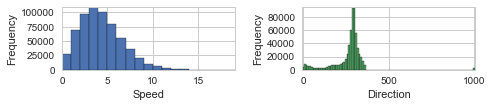

In [8]:
plot_speed_and_angle_distribution(df.speed, df.dir)

date           HrMn            dir          speed  \
count  6.197680e+05  619768.000000  619768.000000  619768.000000   
mean   2.010160e+07    1174.807283     166.611143       4.306039   
std    3.960261e+04     692.455482      82.618124       2.348974   
min    2.003110e+07       0.000000       0.000000       0.000000   
25%    2.006102e+07     550.000000     138.000000       2.600000   
50%    2.011020e+07    1150.000000     157.000000       4.000000   
75%    2.014012e+07    1800.000000     180.000000       5.700000   
max    2.016123e+07    2350.000000     999.000000      18.600000   

        dir_windrose  
count  619768.000000  
mean      263.918403  
std        96.941485  
min         0.000000  
25%       254.000000  
50%       288.000000  
75%       304.000000  
max       999.000000

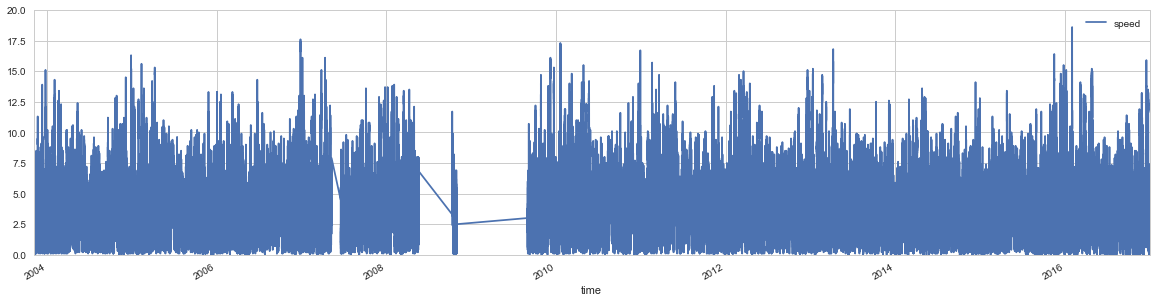

In [9]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [10]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR = 5
    N_VM_PHI = 2
else:
    N_VM_DIR = 4
    N_VM_PHI = 3

In [11]:
if "portus" in file_path: 
    df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


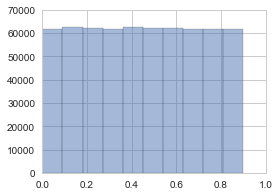

In [12]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [13]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

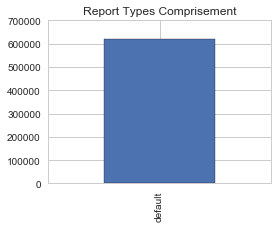

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

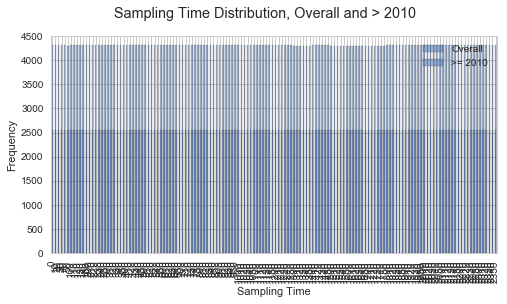

In [15]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [16]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [17]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

date  HrMn  dir  speed     type wind_type  \
time                                                                 
2016-02-01 11:10:00  20160201  1110  161   18.6  default   default   
2016-02-01 11:20:00  20160201  1120  154   17.7  default   default   
2006-12-28 00:50:00  20061228    50  160   17.6  default   default   
2006-12-28 02:10:00  20061228   210  156   17.4  default   default   
2006-12-28 02:20:00  20061228   220  155   17.4  default   default   
2006-12-28 00:30:00  20061228    30  160   17.4  default   default   
2006-12-28 00:20:00  20061228    20  160   17.3  default   default   
2016-02-01 11:30:00  20160201  1130  135   17.3  default   default   
2010-01-19 21:20:00  20100119  2120  226   17.3  default   default   
2016-02-01 13:10:00  20160201  1310  153   17.2  default   default   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-02-01 11:10:00           289    2.4            0.9  
2016-02-01 11:20:00           296   -0.9            0.4  
2006-12-28 00:50:00           290    0.8            1.3  
2006-12-28 02:10:00           294    0.8            0.0  
2006-12-28 02:20:00           295    0.0            0.6  
2006-12-28 00:30:00           290    0.1            0.6  
2006-12-28 00:20:00           290    0.4           -0.1  
2016-02-01 11:30:00           315   -0.4            1.7  
2010-01-19 21:20:00           224    1.0            2.0  
2016-02-01 13:10:00           297    1.6            1.4

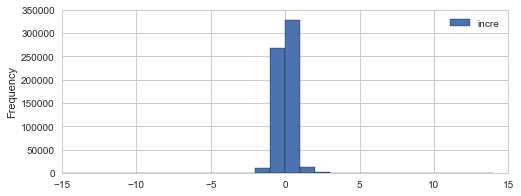

In [18]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [19]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


date  HrMn  dir  speed     type wind_type  \
time                                                                 
2016-02-01 11:10:00  20160201  1110  161   18.6  default   default   
2016-02-01 11:20:00  20160201  1120  154   17.7  default   default   
2006-12-28 00:50:00  20061228    50  160   17.6  default   default   
2006-12-28 02:10:00  20061228   210  156   17.4  default   default   
2006-12-28 02:20:00  20061228   220  155   17.4  default   default   
2006-12-28 00:30:00  20061228    30  160   17.4  default   default   
2006-12-28 00:20:00  20061228    20  160   17.3  default   default   
2016-02-01 11:30:00  20160201  1130  135   17.3  default   default   
2010-01-19 21:20:00  20100119  2120  226   17.3  default   default   
2016-02-01 13:10:00  20160201  1310  153   17.2  default   default   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-02-01 11:10:00           289    2.4            0.9  
2016-02-01 11:20:00           296   -0.9            0.4  
2006-12-28 00:50:00           290    0.8            1.3  
2006-12-28 02:10:00           294    0.8            0.0  
2006-12-28 02:20:00           295    0.0            0.6  
2006-12-28 00:30:00           290    0.1            0.6  
2006-12-28 00:20:00           290    0.4           -0.1  
2016-02-01 11:30:00           315   -0.4            1.7  
2010-01-19 21:20:00           224    1.0            2.0  
2016-02-01 13:10:00           297    1.6            1.4

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [20]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if 'SECTOR_LENGTH' not in globals():
    if integer_data:
        SECTOR_LENGTH = 360/len(effective_column) 
    else: 
        SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       248
1       249
2       243
3       266
4       254
5       245
6       269
7       259
8       272
9       254
10      277
11      261
12      285
13      241
14      300
15      282
16      271
17      277
18      281
19      306
20      325
21      273
22      276
23      320
24      294
25      335
26      295
27      305
28      294
29      330
       ... 
331     268
332     256
333     272
334     229
335     254
336     236
337     239
338     230
339     259
340     245
341     231
342     264
343     236
344     253
345     237
346     268
347     217
348     247
349     257
350     253
351     262
352     248
353     247
354     240
355     264
356     282
357     264
358     241
359     239
999    3277
Name: dir, Length: 361, dtype: int64

360 10


In [21]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0418246259048


1.7     68
2.6     67
2.0     62
3.6     62
2.7     61
4.8     60
1.4     59
2.1     58
2.3     58
4.1     58
3.0     57
3.1     57
4.6     57
4.0     56
3.2     56
4.3     55
4.7     54
2.9     54
3.8     54
1.3     54
1.1     53
1.8     53
2.2     53
4.5     53
2.4     52
1.9     51
4.2     50
0.9     50
3.4     50
1.0     49
        ..
9.4      8
9.5      8
8.4      8
8.0      7
8.8      7
9.2      6
8.3      6
8.1      6
9.0      5
9.1      5
9.7      5
9.8      5
8.6      4
9.9      4
11.3     4
7.4      4
10.0     3
10.7     3
11.2     3
10.6     3
10.5     2
10.2     2
11.1     2
10.9     2
10.8     2
9.6      2
10.4     2
11.6     1
11.5     1
11.7     1
Name: speed, Length: 114, dtype: int64


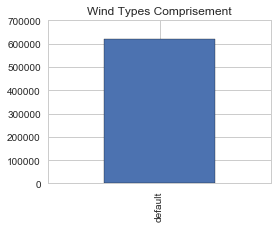

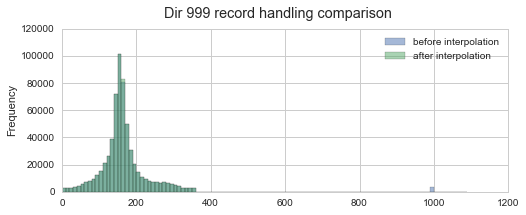

In [23]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [24]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, dir, speed, type, wind_type, dir_windrose]
Index: []

2003 - 2005


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


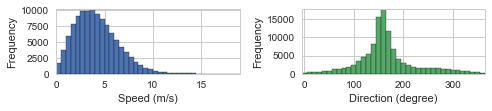

2006 - 2010


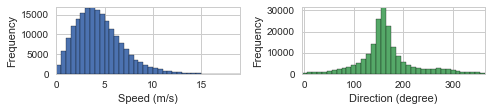

2011 - 2015


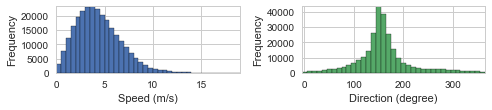

2016 - 2016


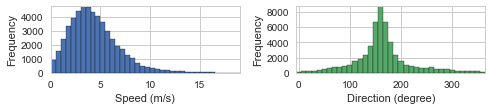

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 6.5)

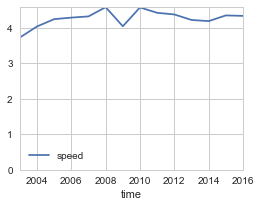

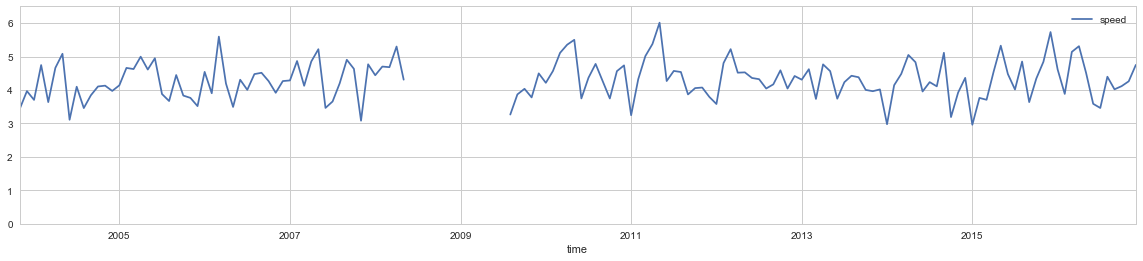

In [26]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [27]:
# %%time
# for column in ['speed', 'dir']:
#     if column == 'speed':
#         bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
#     else:
#         bins = arange(0, 361, 10)
#     den, _ = np.histogram(df[column], bins=bins, density=True)
#     y_top=max(den)*1.2
#     for year in arange(1980, 2016):
#         end_year = year
#         sub_df = df[str(year):str(end_year)]
#         if len(sub_df) > 1000:
#             plt.figure()
#             df[column].hist(bins=bins, alpha=0.3, normed=True)
#             sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
#             plt.gca().set_ylim(top=y_top)
#             plt_configure(title=str(year))
#     align_figures()

In [28]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares, years = [], []
    for year in arange(1980, 2016):
        sub_df = df[str(year-1):str(year+1)]
        if len(sub_df) > 1000:
            current_density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            R_square = sector_r_square(density_all, current_density)
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVIAAADECAYAAADNnakFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHNFJREFUeJzt3XtsU+f9P/C349gh+AJLu07TD9wRijUylJszKMKEorVN
tdEbBRebhU1AC1FJl2ihAZoLEdeoS7qFNgMmpk1JSZaV7tZ2W1fKyELSqHMXKAkpmr9ZuKSlkJbi
Y4hNnef3R4WHZ2MnHNtx4P2SKpHneZx8nmP73ePj85yjEEIIEBHRTUsY6wKIiMY7BikRkUwMUiIi
mRikREQyMUiJiGRikBIRyZQ4kkF79uzBO++8g6tXr8JqtWL27NnYsGEDFAoFZsyYgcrKSiQkJKCl
pQXNzc1ITExEQUEBFi5ciKGhIaxfvx6Dg4PQaDSorq5GSkoKurq6sG3bNiiVSpjNZqxbty7acyUi
ig4RxrvvvivWrFkjvF6vkCRJ1NXViTVr1oh3331XCCFEeXm5eOutt8Qnn3wiFi1aJNxut7h06ZLv
37/85S9FXV2dEEKI119/XWzZskUIIcQjjzwi+vv7xfDwsFi9erXo7u4OVwoRUVwK+9G+ra0NRqMR
zzzzDNauXYv77rsP3d3dmD17NgAgNzcX7e3tOHbsGLKysqBWq6HT6WAwGNDb2wu73Y758+f7xnZ0
dECSJHg8HhgMBigUCpjNZrS3t0f3/xhERFES9qP9Z599hoGBAezevRtnzpxBQUEBhBBQKBQAAI1G
A6fTCUmSoNPpfI/TaDSQJMmv/fqxWq3Wb+zp06dD1mG3229qgkRE4ZhMJlmPDxukkydPRmpqKtRq
NVJTU5GUlISPP/7Y1+9yuaDX66HVauFyufzadTqdX3uosXq9PmyxcicbKXa7nbUEwVqCYy3xWwcQ
mZ20sB/tTSYT/vGPf0AIgXPnzuHKlSuYO3cuOjs7AQCtra3IyclBeno67HY73G43nE4nHA4HjEYj
srOzcfjwYd9Yk8kErVYLlUqFU6dOQQiBtrY25OTkyJ4MEdFYCLtHunDhQrz33ntYsmQJhBCoqKjA
lClTUF5ejtraWqSmpiIvLw9KpRL5+fmw2WwQQqC4uBhJSUmwWq0oLS2F1WqFSqVCTU0NAKCqqgol
JSXwer0wm83IyMiI+mSJiKJhRKc/PffccwFtjY2NAW0WiwUWi8WvLTk5GXV1dQFjMzMz0dLSMtI6
iYjiFk/IJyKSiUFKRCQTg5SISCYGKRGRTAxSIiKZGKRERDIxSImIZBrReaQkn9frhcPhuGH/9OnT
oVQqY1gREUUKgzRGHA4H8jfux8RJdwX0Xf78EzTssMFoNI5BZUQkF4M0gkLtdfb19WHipLug/cr/
i3FVRBRtDNIICrXXOXjmBO6YMnMMqiKiaGOQRtiN9jovf35uDKoholjgt/ZERDIxSImIZGKQEhHJ
xGOkcUAMD6Ovr++G/TzHlCi+MUjjwBXneVTsvYCJkwJPneI5pkTxj0E6Sl6vF/39/X53TL0m1F5l
ODzHlGj8YpCOksPhQPUrxzBx0scBfTxXlOj2NKIgffzxx333oZ8yZQrWrl2LDRs2QKFQYMaMGais
rERCQgJaWlrQ3NyMxMREFBQUYOHChRgaGsL69esxODgIjUaD6upqpKSkoKurC9u2bYNSqYTZbMa6
deuiOtFI4rmiRHS9sEHqdrshhEBDQ4Ovbe3atSgqKsKcOXNQUVGBgwcPIjMzEw0NDThw4ADcbjds
NhvmzZuHpqYmGI1GFBYW4o033kB9fT3KyspQWVmJXbt2YerUqXj66afR09ODtLS0qE6WiCgawp7+
1NvbiytXrmDlypVYsWIFurq60N3djdmzZwMAcnNz0d7ejmPHjiErKwtqtRo6nQ4GgwG9vb2w2+2Y
P3++b2xHRwckSYLH44HBYIBCoYDZbEZ7e3t0Z0pEFCVh90gnTJiAVatWYenSpfjPf/6Dp556CkII
KBQKAIBGo4HT6YQkSX5fwGg0GkiS5Nd+/dhrhwqutZ8+fTpssXa7fdQTjLT+/v6Y/83jx4/D6XTe
sD8etss1rCU41hIoXuqIhLBBOm3aNNx9991QKBSYNm0aJk+ejO7ubl+/y+WCXq+HVquFy+Xya9fp
dH7tocbq9fqwxZpMplFNLhp0Oh3weuAXTdE0a9asG57+ZLfb42K7AKzlRlhL/NYBRCbQw360f/XV
V7Fz504AwLlz5yBJEubNm4fOzk4AQGtrK3JycpCeng673Q632w2n0wmHwwGj0Yjs7GwcPnzYN9Zk
MkGr1UKlUuHUqVMQQqCtrQ05OTmyJ0NENBbC7pEuWbIEGzduhNVqhUKhwPbt2/GVr3wF5eXlqK2t
RWpqKvLy8qBUKpGfnw+bzQYhBIqLi5GUlASr1YrS0lJYrVaoVCrU1NQAAKqqqlBSUgKv1wuz2YyM
jIyoT5aIKBrCBqlarfaF3/UaGxsD2iwWCywWi19bcnIy6urqAsZmZmaipaVlNLXelsItH/V6vTGs
hoiC4Qn5cS7c8tHS5em+MyiIaGwwSMcBLh8lim+8jB4RkUwMUiIimfjRPohwdwMlIroegzQI3g2U
iEaDQXoDvMITEY0Uj5ESEcnEICUikolBSkQkE4OUiEgmBikRkUwMUiIimXj60zgmhocxMDCAkydP
Bu2fPn06lEpljKsiuv0wSMexK87zaDikwIH33w7ou/z5J2jYYbvhlfWJKHIYpOMcrwxFNPZ4jJSI
SCYGKRGRTAxSIiKZGKRERDKNKEgHBwexYMECOBwO9Pf3w2q1wmazobKyEsPDwwCAlpYWLF68GBaL
BYcOHQIADA0NobCwEDabDU899RQ+/fRTAEBXVxeWLl2KZcuW4aWXXorS1IiIYiNskF69ehUVFRWY
MGECAGDHjh0oKirC/v37IYTAwYMHcf78eTQ0NKC5uRn79u1DbW0tPB4PmpqaYDQasX//fjz22GOo
r68HAFRWVqKmpgZNTU04evQoenp6ojtLIqIoCnv6U3V1NZYtW4a9e/cCALq7u313rczNzcWRI0eQ
kJCArKwsqNVqqNVqGAwG9Pb2wm63Y/Xq1b6x9fX1kCQJHo8HBoMBAGA2m9He3o60tLSwxdrt9pue
6P/yer04c+ZM0L6BgQHcCkc9jh8/DqfTGdO/GcnnSC7WEly81BIvdURCyCB97bXXkJKSgvnz5/uC
VAgBhUIBANBoNHA6nZAkCTqdzvc4jUYDSZL82q8fq9Vq/caePn16RMWaTKbRzS6EkydPorD6zRtc
Bf/DW+Iq+LNmzYrpCfl2uz2iz5EcrCW4eKklXuoAIhPoIYP0wIEDUCgU6OjowIkTJ1BaWuo7zgkA
LpcLer0eWq0WLpfLr12n0/m1hxqr1+tlT+Rm8Cr4RBQJIT+/vvLKK2hsbERDQwNmzpyJ6upq5Obm
orOzEwDQ2tqKnJwcpKenw263w+12w+l0wuFwwGg0Ijs7G4cPH/aNNZlM0Gq1UKlUOHXqFIQQaGtr
Q05OTvRnSkQUJaNeIlpaWory8nLU1tYiNTUVeXl5UCqVyM/Ph81mgxACxcXFSEpKgtVqRWlpKaxW
K1QqFWpqagAAVVVVKCkpgdfrhdlsRkZGRsQnRkQUKyMO0oaGBt+/GxsbA/otFgssFotfW3JyMurq
6gLGZmZmoqWlZTR1EhHFrfH/1TQR0RhjkBIRycTL6N2ixPAw+vr6btjPiz4TRQ6D9BZ1xXkeFXsv
YOIkR0AfL/pMFFkM0lsYL/pMFBs8RkpEJBODlIhIJgYpEZFMDFIiIpkYpEREMjFIiYhkYpASEcnE
ICUikolBSkQkE4OUiEgmBikRkUwMUiIimRikREQyMUiJiGQKexk9r9eLsrIy9PX1QaFQoKqqCklJ
SdiwYQMUCgV

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVYAAADECAYAAADEdgl/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHFZJREFUeJzt3X9MVff9P/Dn5XKheH9o2WLSTu8m1pvJCAL3jmbxSuc3
W+kW2zqjt97b0C2trWWVDlYs1AqUqHWkhWzoWOtis+Qi0LvabE27pVtdC0Usbc6KBpE1uzH4uyq6
9p6rcPHe9/ePxvvxlp9e39x70ecjMZH3ed97Xu/3hSeHc895X40QQoCIiKRJincBREQ3GwYrEZFk
DFYiIskYrEREkjFYiYgkY7ASEUk2pWA9ePAgioqKAABHjhyBy+VCUVERHnvsMZw/fx4A4PF4sGrV
KjgcDrz//vsAgKGhIZSUlMDlcuHxxx/HhQsXAAA9PT1Ys2YN1q5di507d4b3s3PnTqxevRpr167F
oUOHpA6UiChmxCR27dolVqxYIdasWSOEEOLhhx8WfX19QgghWltbxYsvvijOnj0rVqxYIYaHh8WX
X34Z/v9rr70mGhsbhRBCvP3222LLli1CCCEeeOABMTAwIEKhkFi3bp04fPiw6O3tFUVFRSIUComT
J0+KVatWTVYaEVFCmvSI1Ww2Y8eOHeGvGxoasHjxYgBAMBhEamoqDh06hNzcXKSkpMBoNMJsNqO/
vx+KomDZsmUAgIKCAhw4cACqqiIQCMBsNkOj0cBut6OrqwuKosBut0Oj0eDOO+9EMBgMH+ESEc0k
yZN1KCwsxIkTJ8Jfz507FwDw73//G83NzdizZw8+/PBDGI3GcB+9Xg9VVaGqarhdr9fD5/NBVVUY
DIaIvsePH0dqairmzJkT0e7z+ZCenj5hfYqiTHGoRETXx2q1RvW4SYN1LH/729/whz/8Abt27UJ6
ejoMBgP8fn94u9/vh9FojGj3+/0wmUxj9jWZTNDpdGM+x1REO3jZFEVhLWNIlFoSpQ6AtYwn0WqJ
1nVfFfDXv/4Vzc3NcLvdmD9/PgAgOzsbiqJgeHgYPp8PXq8XFosFeXl5aG9vBwB0dHTAarXCYDBA
p9Ph2LFjEEKgs7MTNpsNeXl56OzsRCgUwqlTpxAKhSY9WiUiSkTXdcQaDAaxbds23HHHHSgpKQEA
fP/738fTTz+NoqIiuFwuCCFQVlaG1NRUOJ1OVFRUwOl0QqfTob6+HgBQW1uL8vJyBINB2O12LFmy
BABgs9nw0EMPIRQKobq6WvJQiYhiY0rBOm/ePHg8HgDAxx9/PGYfh8MBh8MR0ZaWlobGxsZRfXNy
csLPd62SkpJwYBMRzVS8QYCISDIGKxGRZAxWIiLJGKxERJIxWImIJGOwEhFJxmAlIpKMwUpEJBmD
lYhIMgYrEZFkDFYiIskYrEREkjFYiYgkY7ASEUnGYCUikozBSkQkGYOViEgyBisRkWQMViIiyab0
mVcHDx7Eyy+/DLfbjYGBAVRWVkKj0WDRokWoqalBUlISPB4P2trakJycjOLiYixfvhxDQ0PYuHEj
BgcHodfrUVdXh/T0dPT09GDbtm3QarWw2+3YsGEDAGDnzp344IMPkJycjE2bNiE7O3taB0/TLxgM
YmBgYNyPMl+4cCG0Wm2MqyKaXpMG6x//+Ee89dZbSEtLAwBs374dpaWluPvuu1FdXY19+/YhJycH
brcbe/fuxfDwMFwuF5YuXYrW1lZYLBaUlJTgnXfeQVNTEzZv3oyamhrs2LED8+fPxxNPPIG+vj4I
IfDxxx/jz3/+M06fPo2SkhLs3bt32ieAppfX60XdnkOYNfvMqG2XvjgL93YXLBZLHCojmj6Tngow
m83YsWNH+OvDhw8jPz8fAFBQUICuri4cOnQIubm5SElJgdFohNlsRn9/PxRFwbJly8J9Dxw4AFVV
EQgEYDabodFoYLfb0dXVBUVRYLfbodFocOeddyIYDOLChQvTNGyKpVmz58Jw+7dG/Zs1e268SyOa
FpMesRYWFuLEiRPhr4UQ0Gg0AAC9Xg+fzwdVVSP+1NPr9VBVNaL92r4GgyGi7/Hjx5Gamoo5c+ZE
tPt8PqSnp086CEVRpjDU2GAtkQYGBibc3tvbC5/PF6NqEmNOrmItY0ukWqI1pXOs10pK+r+DXL/f
D5PJBIPBAL/fH9FuNBoj2ifqazKZoNPpxnyOqbBardc7jGmhKApr+Rqj0Qi8Pfo0wFVZWVkxOxWQ
KHMCsJbxJFot0bruqwIyMzPR3d0NAOjo6IDNZkN2djYURcHw8DB8Ph+8Xi8sFgvy8vLQ3t4e7mu1
WmEwGKDT6XDs2DEIIdDZ2QmbzYa8vDx0dnYiFArh1KlTCIVCUzpaJSJKNNd9xFpRUYGqqio0NDQg
IyMDhYWF0Gq1KCoqgsvlghACZWVlSE1NhdPpREVFBZxOJ3Q6Herr6wEAtbW1KC8vRzAYhN1ux5Il
SwAANpsNDz30EEKhEKqrq+WOlIgoRqYUrPPmzYPH4wEALFiwAM3NzaP6OBwOOByOiLa0tDQ0NjaO
6puTkxN+vmuVlJSgpKRkSoUTESUq3iBARCQZg5WISDIGKxGRZAxWIiLJGKxERJIxWImIJGOwEhFJ
xmAlIpKMwUpEJBmDlYhIMgYrEZFkDFYiIskYrEREkjFYiYgkY7ASEUnGYCUikozBSkQk2XV/NAuR
LCIUwtGjR8fdvnDhQmi12hhWRCQHg5Xi5rLvHKp3nces2d5R2y59cRbu7a6YfYIrkUwMVoqrWbPn
wnD7t+JdBpFUUQXryMgIKisrcfLkSSQlJWHLli1ITk5GZWUlNBoNFi1ahJqaGiQlJcHj8aCtrQ3J
yckoLi7G8uXLMTQ0hI0bN2JwcBB6vR51dXVIT09HT08Ptm3bBq1WC7vdjg0bNsgeLxHRtIvqzav2
9nZcuXIFbW1teOqpp/Db3/4W27dvR2lpKVpaWiCEwL59+3Du3Dm43W60tbVh9+7daGhoQCAQQGtr
KywWC1paWrBy5Uo0NTUBAGpqalBfX4/W1lYcPHgQfX19UgdLRBQLUR2xLliwAMFgEKFQCKqqIjk5
GT09PcjPzwcAFBQUYP/+/UhKSkJubi5SUlKQkpICs9mM/v5+KIqCdevWhfs2NTVBVVUEAgGYzWYA
gN1uR1dXFzIzMyetR1GUaIYxLVhLpIGBgagf29vbC5/PJ7GaxJiTq1jL2BKplmhFFayzZs3CyZMn
8ZOf/AQXL17EK6+8gk8++QQajQYAoNfr4fP5oKoqjEZj+HF6vR6qqka0X9vXYDBE9D1+/PiU6rFa
rdEMQzpFUVjL1xiNRuDtM1E9NisrS+qbV4kyJwBrGU+i1RKtqIL1T3/6E+x2O5555hmcPn0aP//5
zzEyMhLe7vf7YTKZYDAY4Pf7I9qNRmNE+0R9TSZTtOMiIoqbqM6xmkym8BHn7NmzceXKFWRmZqK7
uxsA0NHRAZvNhuzsbCiKguHhYfh8Pni9XlgsFuTl5aG9vT3c12q1wmAwQKfT4dixYxBCoLOzEzab
TdIwiYhiJ6oj1l/84hfYtGkTXC4XRkZGUFZWhqysLFRVVaGhoQEZGRkoLCyEVqtFUVERXC4XhBAo
KytDamoqnE4nKioq4HQ6odPpUF9fDwCora1FeXk5gsEg7HY7lixZInWwRESxEFWw6vV6/O53vxvV
3tzcPKrN4XDA4XBEtKWlpaGxsXFU35ycHHg8nmhKIiJKGFwrgIhIMgYrEZFkDFYiIskYrEREknER
FrphwWAQXu/oFaoATLgsINHNisFKN8zr9aLouRbMmj131LbBE0fwjXmL41AVUfwwWEmK8Zb/u/TF
53Gohii+eI6ViEgyBisRkWQMViIiyRisRESSMViJiCRjsBIRScZgJSKSjMFKRCQZg5WISDIGKxGR
ZAxWIiLJGKx

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [29]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)
    
if 'portus' in file_path:
    df = randomize_angle(df, DIR_REDISTRIBUTE, 1)

In [30]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('Speed redistribution info:', speed_redistribution_info )
print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Speed redistribution info: None
619768


In [33]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

date           HrMn            dir          speed  \
count  2.625820e+05  262582.000000  262582.000000  262582.000000   
mean   2.013067e+07    1175.109452     158.866503       4.316917   
std    1.414107e+04     692.396346      55.151129       2.298201   
min    2.011010e+07       0.000000       0.000000       0.000000   
25%    2.012040e+07     600.000000     136.000000       2.600000   
50%    2.013070e+07    1150.000000     154.000000       4.000000   
75%    2.014100e+07    1800.000000     175.000000       5.700000   
max    2.015123e+07    2350.000000     359.000000      16.800000   

        dir_windrose              x              y  
count  262582.000000  262582.000000  262582.000000  
mean      261.565134      -3.017738       1.512478  
std        82.517442       2.759413       2.215590  
min         0.000000     -15.884712     -14.451926  
25%       258.000000      -4.899254       0.215021  
50%       291.000000      -3.037666       1.668692  
75%       306.000000      -1.147153       2.950938  
max       359.000000      12.967758      14.920733

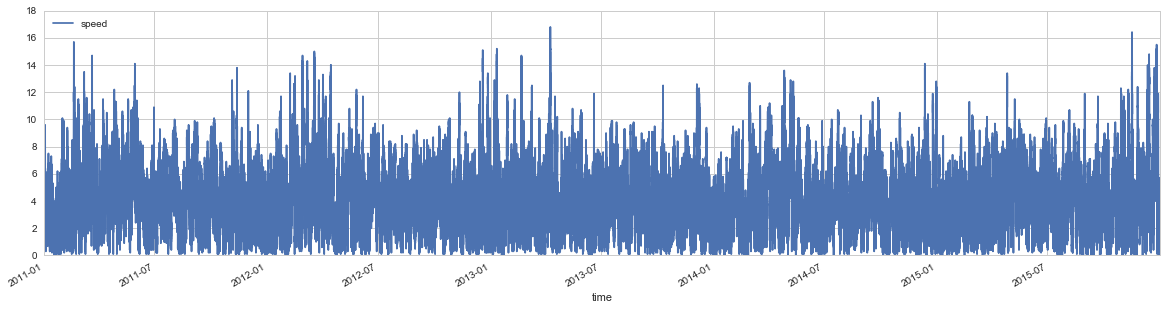

In [34]:
df.plot(y='speed',legend=True,figsize=(20,5))

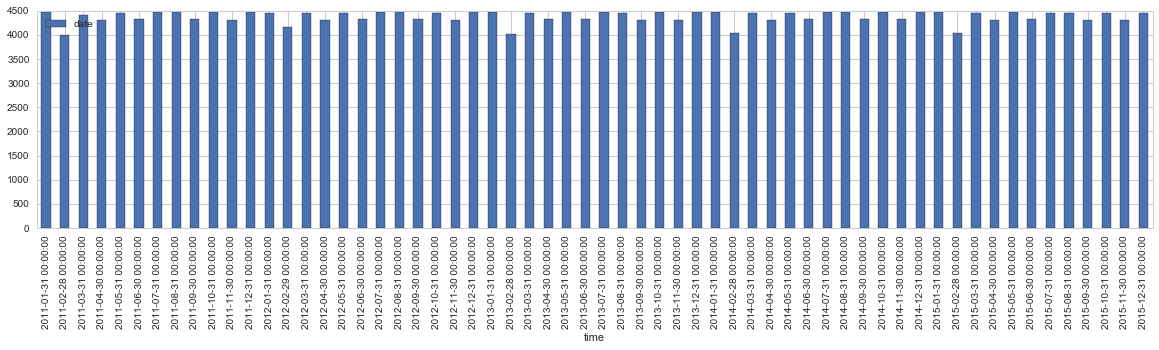

In [35]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


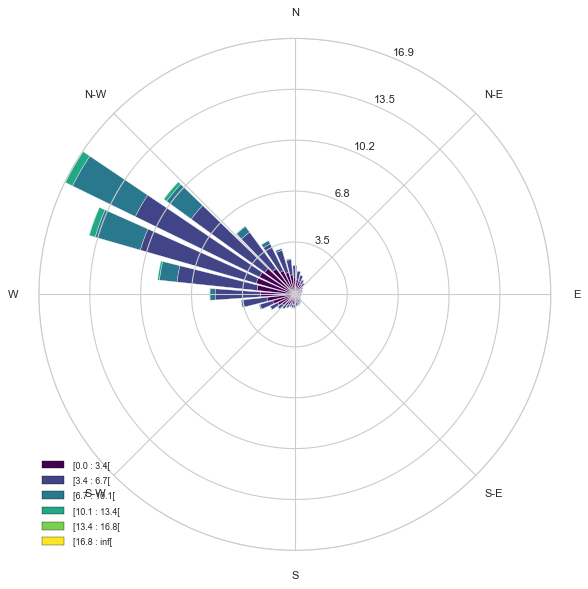

In [36]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [37]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [38]:
x, y_weibull, _, y_cdf_weibull,  weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADPCAYAAADF9XWsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVdX++PE305FZEBxyQhRMBckpcR4jTMtUZhRLSO3+
bPBWhJoDhlNZ3cyQrPSWs4lmYOY8YDiCkgziiKQliiAyKuI5vz+4nK/EjOecfTis1/P4PLDP3nt9
tuiHvddea330FAqFAkEQBDXTlzoAQRAaB5FsBEHQCJFsBEHQCJFsBEHQCJFsBEHQCJFsBEHQCEOp
A1CH+Ph4qUMQhEatd+/eFbapLdnI5XJCQ0O5ePEiMpmMRYsWYWdnV26foqIipkyZwuLFi+nUqRM7
duzg559/BuDhw4dcuHCB2NhYbt68yfTp0+nQoQMAfn5+jB49utr2K7tYbSSXy7l3716ln1lbW6Ov
X/ubz/j4+AZz3aokrlu7VPXLXm3J5sCBAxQXF7N161YSEhJYtmwZERERys8TExNZsGABt2/fVm6b
MGECEyZMAGDhwoV4eHhgaWlJcnIyU6ZMITAwUF3hql1VSSU7O5uoY1cxt2habntBfi6vje2DjY2N
pkIUBLVSW7KJj49n8ODBAPTo0YOkpKRynxcXFxMeHs6HH35Y4djExESuXLnCggULAEhKSiItLY2D
Bw9iZ2fHnDlzMDc3V1foanHv3j1+jIrDzNyy3PY7GTexaGqDhaW1RJEJgmaoLdnk5+eXSwgGBgaU
lJRgaFjaZHW3f6tXr2bGjBnK711cXPDy8sLZ2ZmIiAjCw8MJCQmptn1t67fJyckhL78QOUbltucX
FFH04A4lj8vvX5B/n4SEQqysrOrUjrZdt6aI69Z+aks25ubmFBQUKL+Xy+XKRFOd3Nxc0tLS6Nev
n3Kbm5sblpaWyq/DwsJqPI+2PctmZWVxJftShTuYy0knuXIxEf+gDzAxNVNuz8s1oUePznV6jNLW
Z3h1E9etXapKgGp79d2rVy9iYmIASEhIoHPnzrU67syZM/Tv37/ctqCgIM6fPw/AiRMncHJyUm2w
Eih++IAfVy3m2y8+4tCvW/hswZs8eFAodViCoDZqu7Nxc3MjNjYWX19fFAoFS5YsITo6msLCQnx8
fKo8Li0tjbZt25bbFhoaSlhYGEZGRtja2tbqzkabXb96gVWfBPPXn1dp8Uw7bFu2ISXhJF+EzuCD
hRHImhhLHaIgqJzako2+vj4ff/xxuW2dOnWqsN/69evLff/GG29U2MfJyYktW7aoNkAJyOWP2bVt
DT/9uILHJY94cewkhr/kiZHMhC1rPiXu+EG+WPgW74WGI5fLyc7OrvQ8dX0lLgjaQPyL1ZCbN2/y
Zdi7bF7zGRYWTQkOW81r/+8jjGRNMDA05O3ZX9Cj71ASz8ayYtG75N7PZtv+FCIPXSr358eouCrH
5Qi67bXXXlN2JxQXFxMUFMT333+v/DwgIIALFy5UOC4mJoatW7dy8+ZNvL29a93ewIEDlee9evXq
U0Yvko1GbNmyhSFDhnAp+Sx9BoxkacQv9Hh+SLl9DI1kvDt3BS69B5Fw+igbvllKE2MTLCyty/35
56tzofEYOHAgcXFxQGknrIuLC0ePHgVKB8H+9ddfdOnSpcJxQ4YMqbbrQlNEslGjnJwcJk2ahJ+f
H48fPybgzdnMnLcSS6tmle4vkzXh3/NX4tSjH0nnTrD+myU8flyi4aiF2ggODqZDhw4q/RMcHFxt
mwMGDFAmm6NHjzJ8+HDy8vLIy8vj3Llz9O3blzNnzuDn58ekSZOYPXs2jx49YseOHXz22WdA6SDS
N998Ey8vL8LDwwGYNWuW8mVOTEwMs2bNUsvfmUg2KiSXy8nKyiIrK4uoqCi6d+/Oxo0b6d27Nzt3
7mTA8FfQ09Or9hyyJsa8FxpOx87O/HHmKBHLZyF//LjaY4TGoVu3bly7dg2FQsGZM2fo2rUr/fv3
5/jx45w+fZpBgwYxb948vv76azZs2EDLli2V03/KFBYWsnz5crZs2cKxY8dITU3VWPw6ORFTKmWj
hC+cP8OaFfPR09NnjGcgoz1e58SFDCya6mPZtOaRwsbGpgS+s5Dvv5zPiSO/YmhoyLT3lohOYS2y
fPlyli9frtE29fX16dKlCzExMTRv3hwjIyOGDBnCkSNHSE1NZeLEicybN4+ZM2cC8ODBAwYMGFBu
TmKXLl2wsLAAoHv37qSlpZVrQ51Lkot/vSpmZm7JoV+3oqenz7zP1uP/RjBW1s0xNbOo03mMTUyZ
9v4SOj3rwrEDv7DmqwXI5XI1RS00FAMHDmT16tXKqUC9e/cmJSUFuVyOtbU1rVq1YtWqVaxfv543
33yz3OBYgKtXr1JQUEBJSQnnz5/H0dERmUxGZmYmACkpKWqLXSQbFfv7ZhrXLifh0nsgnbv1fKpz
mZiaE7LoWzo4dOPInkh+XBWm1t88gvYbMGAA8fHxDB06FACZTIaFhQV9+/ZFX1+fjz76iGnTpuHr
68umTZsqDKZt2rQp//73v/H19cXd3R0HBwe8vLz44YcfeP3118tNjFY18RilYqdi9gAw6IVXVXI+
M4umzFryPUtCpnBg1xbkcjmeI8JVcm6h4WnTpg0XL14EUCaGVatWKT8fNGgQgwYNKndM2UoKAFFR
URXO2b17d6Kjoytsj42NBSqOhasvcWejQnK5nNPH9mJiak7vfiNUdl4LS2tmL11LWzsHDu3+iWPH
jqns3IKgKSLZqNDvv//Ovaw7uA52V/mUA0urZkx7bzEAK1euVOm5BUETRLJRoW3btgGqe4T6p07P
utDZqReHDx/m3LlzamlDENRFJBsVKSgoICoqimbNW/Gsk/qm/bu/OgmATz/9VG1tCII6iGSjIjt3
7qSgoIB+g0epdTxMl+7P06VLF3766Sfi4uKUgwizsrLEq3FBq4m3USpS1mPvOmSUWtspKszHpf9o
UlNTef+jJfi/UTrEvSA/l+faix+nplS3UH196fpsfvGvUwVu3brF/v376d27Ny1bt1d7e30Hj+Lw
bz9x4shufAPfp6lV2Wp+YvEtTalqTen6qu0C96dOnWLmzJk4ODiQm5uLiYkJkydPrrLayN9//01q
aiojRqju7Wh9aVUpF4Dx48cr1y5u27YtS5cuJT09nVmzZqGnp4ejoyMLFizQqt8AmzZtQi6Xa2xm
rYGBAaMnvM6Pqxaxd+d6vF+fqZF2hfLMzC0lWai+X79+/Oc//yE+Pp4uXboQEBCAvb09Xbt2rbDv
yZMnuXbtmm4nm/qUcnn48CEKhaLCIKKlS5cyc+ZMXF1dmT9/PgcPHsTNzU1dodfZunXrMDIyYty4
cRxKuKuRNoe+OIEdG8PZv2szr3hP1UibgvYxMzPDx8eH3bt3s2HDBjIyMrhz5w4jRozgnXfe4dtv
v+XBgwf07NkTCwsLvv76axQKBQUFBXz++efY29trLFa13R7UtpRLx44dldtSU1MpKioiMDCQyZMn
k5CQAEBycjJ9+/YFStfmOH78uLrCrrM//viD8+fPM2bMGJo1q3zpCHVoYmyC+9hJFObncui3nzTW
rqB9bGxsSElJoUePHqxZs4bIyEi2bNmCgYEB06ZN4+WXX2bkyJFcvnyZ5cuXs379el588UX27Nmj
0Ti1qpSLsbExQUFBeHl5cf36daZOncqePXtQKBTKpRnMzMzIy8ursX1Nlbj48ssvgdIJcgkJCWRk
5JKXX1Rhv8w7dzAwkFUo2fI027s/P4Kon77j18i1dOzaG4dmNg2qtIcqafq6c3JyqvxZ10dtS/dc
unSJ7Oxs5fXGx8dz6tQpWrVqxaFDh9i9ezcmJiY8ePCA+Ph4rl+/TkZGBvHx8eTn5/PBBx9gbGxM
dnY2nTt31uj

In [39]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 2.2 Overview by Direction

In [40]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [41]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre, BIN_WIDTH)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANMAAAB6CAYAAAAlFGb/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEpBJREFUeJzt3XtQVGXcB/DvclMSFEzFmQZMRDRQcBFFMzAtRfMG6qiL
YoWa11IrBDW8rSZoOqkDpiGjoWbeMEer8ZLKqwkTK2aCiuCAmcIiF9nlKvB7//DlvK7cFnhwkX6f
GWf2POfZ8/yeXb57zp5znJUREYEx1mRGhi6AsdaCw8SYIBwmxgThMDEmCIeJMUE4TIwJ0irD9PTp
U6xbtw4eHh7w8PDApk2bUFFRIaw/AGi1WowbNw75+fm19lm1ahV69eql82/dunW19r979y6mT58O
V1dXjBkzBrGxsfVPth6zZs2qVsOePXtq7Z+QkABfX1+4uLhg0qRJ+Pvvv6V1Z86cwfLlyxtdy6lT
pzBx4sRq7WfPnsWoUaPg4uKCmTNnIiMjQ2f95cuXMX78eLi4uGDChAmIj4+vcfspKSno06dPreub
HbVCoaGhNGLECEpMTKQrV67QkCFDKDw8XFh/IiKlUknfffddnX2mTZtGERERpFarpX8ajabGvsXF
xeTl5UUhISGUmppK4eHh1LdvX0pPT69/wnXw9PSkmJgYnRqKiopq7JuZmUlyuZy2bdtGqamptGbN
GvLw8KAnT55IfSZNmkTx8fENruPy5cvk6upKvr6+Ou1JSUnUp08f2r9/P6WkpNCnn35K3t7e9PTp
UyIiunXrFjk7O1N4eDilp6fT5s2byc3NjbKysnS2U15eThMnTiRHR0eKi4trcH0itLowlZSUkKur
K507d05qO378OA0ePJgqKiqa3J+ISK1WU79+/Sg/P7/OWgYOHEiXLl3Sq+6YmBgaPHgwlZWVSW0z
Zsyg0NBQvZ5fE41GQ46OjpSamqpX/x07dpCPj4+0XFlZSe+99x5FR0fr1DljxowG1REaGkrOzs40
duzYamEKDg6mhQsXSsuFhYXUr18/+v3334mIaOnSpTRv3jydmnx9fens2bM629m5cydNnz7doGFq
dYd5t27dQnFxMQYOHCi1ubu7IycnB/fv329yfwD46aefIJfL0aFDh1rryM7ORn5+Prp3765X3deu
XYNcLoepqanUNmDAACQmJur1/JqkpqbCxMQEdnZ2evVPTEzEgAEDpGWZTIb+/fvr1DBs2DAkJibi
zp07etcRFxeHffv2YeTIkfWO+dprr8HZ2RnXr18HAFy9ehWjR4/Wqen48eN4//33pba7d+9i3759
WLt2rd41NYdWF6asrCyYm5vD0tJSauvcuTMAIDMzs8n9AeDixYvw9PSss47U1FTIZDJ8//33GDp0
KD744ANERUWhsrKyxv5qtRpdunTRaevUqROysrLqHKe+GiwsLBAcHIx33nkHEyZMQExMTK399amh
Q4cO6Nu3Ly5duqR3HTExMejfv3+N67KysmocMzMzExqNBrm5uTA1NcWiRYvw9ttvQ6FQ6IS7oqIC
wcHBWLx4Mbp27ap3Tc2h1YWpuLgYbdq00WkzMzMDAJSVlTW5f0VFBZKTk+Hg4FBnHffu3YORkRHs
7Oywe/duBAQEIDw8HJGRkQ2qu6Ya9JWWloaSkhIMHjwYkZGR8PHxQUhICE6fPt2kGhwcHHDz5s1G
1/W8kpKSWscsLCwEAKxfv16aQ9++ffHRRx/hwYMHAIDIyEhYWFhg6tSpQuppChNDFyBa27Ztq735
Vcvm5uZN7p+fn4+KigpYW1tLbbNnz4ZKpZKWT58+DT8/P4wZMwZWVlYAgF69euHJkyfYu3cvPvnk
E73raNu2bY3zHDNmDB4+fCgt13Q4+OWXX2LevHnS4Wjv3r3xzz//IDo6GmPGjGl0DVZWVrh3716N
dTVUbWOam5vDxOTZn+fYsWMxffp0AICTkxPi4uJw5MgRjBs3DlFRUTh69ChkMpmQepqi1YWpa9eu
KCoqglarhYWFBYBn318AwMbGpsn9q9605w/XNmzYgJKSEmm5S5cukMlkUpCqODg44PHjx6ioqICx
sbHOOhsbG2ncKtnZ2TXWAAC7d+9GeXl5jeuqGBsbV/te16NHD1y8eLHG/vrWUFFRASMjMQc1tY05
YMAAWFlZwdTUtNpRgL29PR4+fIjffvsNGo0G48eP11k/Z84c+Pj41HkZojno9Yrk5ORg6NChSEtL
Q0ZGBhQKBfz8/LB69Wrpj+rw4cOYOHEipkyZggsXLgB4tgv/9NNP4efnhzlz5iA3N7f5ZvJ/evfu
DXNzc509RUJCAjp16lTjF/GG9re2toaJiQny8vKkNhsbG3Tr1k36Z2Jigg0bNuDjjz/Wee7Nmzfx
5ptvVgsSAMjlciQmJuoEJCEhAXK5vMZ5vvHGGzpj1mTRokVYuXKlTltSUhLs7e1r7C+Xy5GQkCAt
E5F0YuR5eXl50vfKpnpxzKKiIiQnJ0Mul8PExASurq5ISkrSeU5aWhpsbW0xY8YM/Prrrzhx4gRO
nDiBH3/8EcCzw8LFixcLqa9B6jvdV1ZWRgsWLKCRI0dSamoqzZ07Vzr1GBISQmfOnCG1Wk1jx46l
0tJSKigokB5HRUXR9u3biYjo1KlTpFQqm/XUZBWlUknDhw+nhIQE+uOPP2jIkCE614Ty8vIoLy9P
7/4vmjx5Mu3atavOGuLi4qh37960a9cuysjIoJiYGOrXrx/9/PPPRPTsuoharabi4mIiItJqtTRk
yBAKDg6m1NRUioiIIBcXF7p//36jX4eYmBhycnKio0ePUkZGBu3du5ecnZ3pzz//JCKi0tJSUqvV
VFpaSkREjx49IldXV9qyZQulpqbS2rVradCgQVRQUKCzXV9fX4qKiiKiZ9fH1Go1lZeX11vP9u3b
q50av3HjBjk5OdHevXul60yjR4+WtnfhwgVydnamQ4cOUXp6OoWFhZGrqyv9888/1bav1WoNemq8
3sO8sLAwTJs2Dbt37wbw7JOt6jSyl5cXrly5AiMjI8jlcpiZmcHMzAx2dna4ffs2VCoVZs+eLfWN
iIjQK+DP7yUa47333sODBw8wa9YsmJqawsvLC25ubtJ2lUolACAkJESv/i9ydHTEuXPnaj1DBQAm
Jib47LPPcOTIEWzfvh3W1tZQKBR44403oFKpkJ2djcWLF2Pu3LkYOnQoAGDp0qWIiorChAkTYGNj
gyVLlkCtVkOtVjfqdbC1tcXMmTOxY8cOPH78GDY2Nli0aBFkMhlUKhWSk5Oxfv16fPXVV3BycpJq
+OGHHxAVFQU7Ozt8/vnnSElJkbZZVFSE27dvIyAgACqVCpcuXcKuXbuwbdu2evdWDx8+RFFRUbXX
dd68eYiMjMQ333yDnj17YtGiRdKpcUtLS8ydOxc7d+6EUqmEra0tAgMDkZWVVe1MZ9WhdkpKivR9
qznU9r7LiGr/n7bHjx9HZmYmFixYAH9/f6xZswYffvghLl++DODZNYBjx47B09MTKSkpCAwMBAAs
W7YMPj4+2L17N0JCQtCjRw9UVlbi3Xff1esWmaaGqbnl5ubiiy++wLffflvntabW6Pz584iLi9M5
fNy0aRPmzp37n3ktagtTnfE9duwYZDIZrl69ilu3biEoKEjne09hYSHat28PCwsL6TRmVbulpaVO
e1XfphbcUkyaNAm3bt3CwoULa+2jUqla/Dzq8/wciAhKpRLBwcFS27Vr12BtbY3hw4cbssx6iXov
6vqgr/MExIEDB7B//35ER0fjrbfeQlhYGLy8vKQbCWNjY+Hu7g4XFxeoVCqUlpZCo9EgLS0Njo6O
cHNzky7uxcbGvvJ/WM/7/PPP8csvv9R5o2tr89tvv8HR0RGDBg2S2lxcXLBz504DVtVyNPjAMigo
CCEhIdi6dSv

Wall time: 8.86 s


## 2.3 Overview by Month

In [42]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4VGX69z/TS2YymZn0Xkgh9Kr0JqCoy1rQVXQX1127
ruva3tWVtaziLmtDf+quiooKiKCIBVQQBCkSekjvvc6kTS/n/SNmICSBAJMAbr7XlQvmlOc8c+Z8
z30/dxUJgiAwgAEM4IKA+FxPYAADGEDvMUDYAQzgAsIAYQcwgAsIA4QdwAAuIAwQdgADuIAwQNgB
DOACwgBh/wcw4Ln75WCAsP2AmTNnkpqaypIlS7rdX1lZSWpqKqmpqZhMJr9e+7vvvmPx4sW+z8uW
LWPUqFF+vUZbWxszZsxg48aNfh13AF0xQNh+gkgk4ttvv+1236ZNm/rsuu+99x61tbV9Nn5bWxt3
3XUXVVVVfXaNARzDAGH7CaNGjaKiooKsrKwu+zZu3Ehqauo5mNXZ4aeffmLBggXk5OSc66n8z2CA
sP2EwYMHExMT00WaVlVVceTIES699NIu53z77bdcc801jBw5kmnTpvHSSy/hdrt9+2fOnMl///tf
Fi9ezPjx4xk9ejSPPPIIbW1tANx888389NNPbN26ldTUVCoqKnznfvXVV8ydO5dhw4Zx9dVXs3//
ft++iooKUlNTWbZs2Um/0913301KSgpvvfXWGd2TAZw+Bgjbj5gzZ04XtXjTpk2MGDGC8PDwTttX
r17NPffcw/Dhw3n11Ve56aabeOedd3j00Uc7Hffmm2/S0tLCCy+8wP3338+XX37J66+/DsDixYtJ
T09n9OjRrF69mtDQUABsNhsvvvgi9913Hy+//DI2m417773X9zIIDQ1l9erVLFiw4KTf58MPP+Tl
l1/GYDCc1X0ZQO8hPdcT+F/CpZdeyttvv01hYSFJSUlAuzp82WWXdTrO4/Hw0ksvcfnll/sMRpMn
T0ar1bJ48WL+8Ic/kJaWBkB4eDgvvPACIpGIyZMns23bNt566y3Gjx/PtGnT0Gg0qNVqHnjgAd5/
/32g3Wr8r3/9i5EjRwLgdru59957KSgoIC0tDblc7tt3MqSkpPjt3gygdxiQsP2IYcOGERERwTff
fANAdXU1hw8fZu7cuZ2OKyoqwmQydVGTL7/8cgAyMjI6jSkSiXyfQ0JCgHbp2tra2u08JBIJw4cP
932OiooC6PH4AZw/GCBsP0IkEnVSizdt2sTw4cOJiIjodFxzczMARqOx03atVotcLvetUQFUKlWX
a0gkEiZPnsxzzz3X7TwUCgVi8bGfvuP/Xq/3DL/ZAPoLA4TtZ8yZM4ejR49SUVHBpk2buqjDAEFB
QQA0NjZ22t7S0oLT6fTtPxkeffRRdu3aRVNTk38mPoDzAgOE7WeMHj2akJAQVq1axaFDh7qowwAJ
CQno9fougQhfffWVb4xTQaPR8PTTT1NSUtLJsjyACxsDRqd+hlgsZvbs2bz77ru+Ne2JkEgk3HPP
PTz99NPodDpmzZpFbm4uy5Yt49JLL+21sWfy5MmEhIRw4MABVCoVDoejV+c5nU6ysrIIDw/vYr0e
wLnFgIQ9B5gzZw4ul6tb32sHbrrpJv7xj3+wZ88e7rjjDj788ENuueUWli5delrXeuqpp7DZbDQ0
NFBQUNCrc+rq6rj++utZs2bNaV1rAH0P0UBNp18WKioq+O1vf8uWLVt823bs2MGtt97K5s2biY6O
PoezG8DZYoCwAxjABYQBlXgAA7iAMEDYAQzgAsIAYQcwgAsIA26dXwC8Xi8ej8dXWUIQBN//RSJR
pz+JRNIplPFc4D//+Q9r165FLpczb9487rzzzk77d+3axfPPP4/H4yEqKornn38enU53jmZ7fmHA
6HQeQxAEXC4XTqcTl8vl+3M4HL5tbrf7tEMKJRIJMpkMmUyGXC5HLpf7PstkMhQKBVJp37zLd+7c
ybPPPsvKlStRq9XcfffdXH311cyZMwdoT3yYMWMGy5cvJykpiaVLlyIWi3nggQf6ZD4XGgYk7HkC
QRBwOp1YrVYsFgsWiwWr1YrX60UsFvv+pFIpUqkUlUqFTqdDoVD4SNdBMrFYjMfj4eDBg4wcORKR
SIQgCLjdbpxOJw6Hw0f6jmt2EN/r9SIIAjKZDLVa7cv2UavVfiFxVlYWU6ZMQavVAjBlyhS+++47
H2ElEgmbN29GJpPhdDqpra29IJP7+woDhD1HcLvdtLa2diGnVCpFJpOhUqkwGo3odDpkMtlZXasj
uF8ikaBQKHxk6Q6CIGCz2WhubsZisdDQ0IDL5cLr9XYicUBAABqN5rTV6yFDhvDss89y++23o1Kp
2LJlS5cicTKZjOzsbH7/+98jk8kGpOtxGFCJ+xEOh4OmpibMZjMWi8WnmqrVanQ6HTqdDolE4pdr
HS9h/TGm0+nEbDbT0tKC3W7H5XIhEonQ6XQEBQWd1tyXL1/OunXrCAoKYsKECRw6dIg333yz22M/
+ugjPv/8c1atWnXW3+GXgAHC9iEEQcBqtWI2m2lqasLhcCCTydBoNISEhJxU0p0t/E3YE+H1ejGZ
TDQ2NmKz2fB4PAQEBGAwGHyqendoa2ujqanJF3G1fPlyKisrefzxxwGwWq3s3r2bmTNn+j5PmjSJ
AwcO+P07XIgYUIn9DEEQfKpkU1MTXq8XhUJBUFAQYWFhZ63eni8Qi8UEBwcTHBwMgMVioa6ujpqa
GsrLy1EoFOj1ekJCQpDL5b7zKisrefDBB1m3bh12u501a9bw9NNP+/ZLpVIef/xxli9fTmpqKl9+
+SVjx47t9+93vmKAsH6Cx+PBbDZTW1uLw+FAoVAQHh5OaGhop2TxXyoCAgJISEgA2lX/2tpaGhsb
qampQafTERoailarJTU1lSuuuIL58+fj8XhYtGgRY8aM4bHHHmPmzJnMmjWLF154gUcffRSv10t4
eDjPPPPMOf525w8GVOKzhN1up66ujoaGBsRiMUFBQURFRZ1zSdrXKnFv0dbWRmVlJRaLBalUSlhY
GEajsc/cRr90DNy1M4AgCDQ1NVFbW4vFYkGpVBIXF4fBYDjnQQnnGzQaDampqXg8Hqqrq6mpqaGy
shKDwUBoaChqtfpcT/GCwoCEPQ0IgoDJZKKyshKPx4NGoyEmJgalUnmup9YF54uE7Q5ms5mqqirs
djsajYbo6GgCAgLO9bQuCAxI2F5AEARaWlooLy/H5XKh1+uJiYk574hwoUCv16PX67HZbJSWlpKT
k+NbSpyPL7/zCQOEPQXa2tooLy/HZrMRFBREXFzcAFH9BJVKRVpaGjabjeLiYo4ePYrRaCQyMrKT
ZXkAxzBA2B5gs9moqKigtbUVrVbLsGHDzrkh6ZcKlUpFeno6bW1tlJSUkJmZSWhoKOHh4QPGqRMw
cDdOgNvtpry8HJPJhFqtZvDgwV1q/w6gb6DRaBg6dCgmk4mKigrq6+uJiIggLCxswJj3MwYIexzM
ZjOlpaWIxWKSk5MJDAw811P6n4TBYMBgMFBVVUV1dTUmk4nExMSB9S0DhAXapWppaSnNzc2EhIQQ
FRX1PxHscL4jMjKS0NBQCgoKyMrKIjIy8n9e2v7PE9ZsNlNSUoJMJhtQf/2ElStXdgrWr6qqYvr0
6fzrX//qcmxWVhbXXXcdmZmZ3Y4llUpJS0ujoaHBt1T5X5a2/7N+2OOlalhYGJGRkb+oN/f54oct
Li7m1ltvZeXKlYSFhXXaZ7PZuOWWWzhw4AC5ubmnHMvj8VBQUIDFYvmflbbnjd7X0UR427ZtnbbP
nDmzUyNil8vFqFGjMJlMvm0333wz11xzje9zc3Mzo0aNwul0dnsts9lMZmYmVquVwYMHExUVdcH/
8McnqHf8Ab7

Wall time: 19.1 s


In [43]:
df.describe()

date           HrMn            dir          speed  \
count  2.625820e+05  262582.000000  262582.000000  262582.000000   
mean   2.013067e+07    1175.109452     158.866503       4.316917   
std    1.414107e+04     692.396346      55.151129       2.298201   
min    2.011010e+07       0.000000       0.000000       0.000000   
25%    2.012040e+07     600.000000     136.000000       2.600000   
50%    2.013070e+07    1150.000000     154.000000       4.000000   
75%    2.014100e+07    1800.000000     175.000000       5.700000   
max    2.015123e+07    2350.000000     359.000000      16.800000   

        dir_windrose              x              y  
count  262582.000000  262582.000000  262582.000000  
mean      261.565134      -3.017738       1.512478  
std        82.517442       2.759413       2.215590  
min         0.000000     -15.884712     -14.451926  
25%       258.000000      -4.899254       0.215021  
50%       291.000000      -3.037666       1.668692  
75%       306.000000      -1.147153       2.950938  
max       359.000000      12.967758      14.920733

# 3. Create input data and configuration

In [44]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
# FIT_METHOD = 'chi_square'
# FIT_METHOD = 'k_s'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [45]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

[-9.  -8.5 -8.  -7.5 -7.  -6.5 -6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.
 -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5
  6.   6.5  7.   7.5  8.   8.5  9. ]


# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

0.5
Wall time: 2min 59s


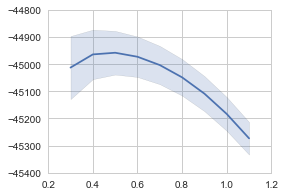

In [47]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.3,1.2,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=40000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH
         }

In [49]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.5 1369
[  2.01773489e-06   2.44337696e-06   2.47044914e-06   6.73656726e-06
   1.42286936e-05]


In [50]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=pdf_fig_size)
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAADnCAYAAADl9EEgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztvXmYI2d1PvpWlXap92Wm980z3ghegAAx5sc1i4PvTQgx
Y2McJ2D/bC6Q8DjBxpgYY2BiOyE2ARsMPyc3CfAkOEBCFidOzGaHwGNskhniGXvsTC9Sq7vV6pbU
2lWq5f6h/j59VaqSStXaekbv88wz3WpVqSR9b53znfOeczhVVVV00UUXHQe+3RfQRRddGKNLzi66
6FB0ydlFFx2KLjm76KJD0SVnF110KLrk7KKLDkWXnF100aHokrOLLjoUXXJ20UWHokvOLrroUHTJ
2UUXHYouObvookPRJWcXXXQouuTsoosORZecXXTRoeiSs4suOhRdcnbRRYeiS84uuuhQdMnZRRcd
ii452wxFUZDL5VAsFtFt59QFC67b4Kt9iMfjkGUZbrcb2WwW8XgcU1NT4HkeDocDDocDHMe1+zK7
aBMc7b6AsxGKokCWZaRSKeTzeSiKAkEQUCwWIcsyFEVBsVgEx3Hgeb5L1rMUXcvZYsiyDEmSIEkS
lpaWIEkSRkdHkU6nkU6nAQBerxderxc+nw8ejwccx1GXVxCELlnPEnQtZ4ugqipkWYYsy8jlcgiF
QhAEAf39/ejt7YXD4UCxWMTExARyuRyy2Sw2NzdRLBbh8Xjg8/ng9Xrh8XioZQXKZHU6nRAEoUvW
MwhdcrYAiqJAkiTIsoxYLIZoNIrx8XGIoghJkgCAWkdBEBAIBBAIBACULG02m0Uul0MkEoEkSRrL
6na7u2Q9Q9ElZ5MhyzKKxSIkSUI4HIYsy1hYWIDL5cLW1lbN4wVBQE9PD3p6egAAkiRRy7qxsUHJ
SiyrEVkFQYDD4eiSdZ+hS84mQVVVai0zmQxWV1fR39+PAwcOaAhS75bf4XCYkjWRSECWZUpWn88H
l8sFRVEgiiISiQQ8Hg91o7tk7Wx0ydkEsG5sNBpFPB7H5OQkdVUJWGKwQZ96YETWbDZLyaooCiVr
NpsFUAo4iaIIjuM0AaYuWTsLXXI2GISUoihidXUVPM/jnHPOgcPRmo/a4XCgt7cXvb29AIBisUgt
K9m75nI5almdTic4juuStQPRJWeDwLqxyWQSa2trGB4exvDwsOkCt2st64HT6YTT6aRkdblcEAQB
uVwOsVgMqqrS/WqXrJ2FLjkbAJK7lGUZkUgEqVQKMzMz8Pl8NY8l5GwFUYFSgKivrw99fX1QVVVj
Wbe3t8FxnCbA5HQ6AaBL1jagS849QFVVJBIJ5HI5+P1+hEIheDwenHPOORAEoebx7V7YHMfB5XLB
5XJpyEpc4K2tLXAcp7GsQMl115PV6XSC5/m2v6czCV1y2gQJ+uTzeSQSCWxubuLAgQMYGBjYtwuU
JWt/f7+GrJlMBltbW+B5XmNZAS1ZSd62t7e3S9Y9oktOG2AlePF4HIVCAfPz8/B4PHWdh3VlW+XW
1gMjsoqiiGw2i3Q6jc3NTQiCoLGsqVQKxWKRurxdy2ofXXLWATboQyR4brcbfr+/bmLuR3AcB7fb
DbfbjYGBAQ1ZU6kUNjc3KSHT6bShZWVFEV2yVkeXnBbB5i63t7extbWFiYkJAKXSLzvgOA6KoqBQ
KACoX5DQbhiRNRqNolAoIJlMIhKJwOFwaEQRAOh2gOf5LlmroEtOCyCkLBaLWF1dhaqqVIKXTCZt
n5e1wIqiQFVVxGIxqpndbwuVWEav14vh4WGoqopCoYBsNoudnR1KVkJU1rIWCgVwHEdJSqLBZzO6
5KwC1o1Np9MIh8MYGBjA6OgoJY7dvWI2m0UkEgHP85ifn0ehUEAoFIIkSRWaWSLD2ytZW22ZOY6D
x+OBx+PB4OAgVFVFPp9HLpdDIpHAxsYGnE5nRYCJkPpsJ2uXnCYg4nEiwUskEqYSvHoWvaqq2Nra
wtbWFgYGBlAoFOjiA4DR0VEAWhlePB6nYgFW2WMHzbbGqqpWFV2QihqWrERquL6+DpfLpQkwSZJE
yUrc4LOFrF1y6sDWXYqiiFAoBIfDYSrBq4ecpDJFkiQsLCygUCggn88bPtdIhsfmH9mUhs/na5k8
sBaqkVMPlqxA6YZILGs8Hsf6+jrcbrfGsqqqClVVsbKygv7+fvT09JyxZO2Mb7RDQII+iqJgZ2cH
6+vrGBkZwdDQ0J4leNlsFqFQCH19fZiengbHcTQQZAVOp1Oj7NFHSfV7uXYuVLvWmed5+h6GhoYo
WbPZLGKxGPL5PNxuN3w+HwqFAk1pnamWtUvOXbASvPX1dWSzWczOztK7ul2wbuzExAS1hOzfgfos
sFGUlARe2L0cS1aeb02jxXosZy2wZAWgIWuxWMT6+jo8Ho+mpQuxrGcCWc96chLyeL1eyLKMUCgE
r9eLhYUFyxI8M1Lp3ViXy1VxbCNgFHghellicTweD2RZhtPpbCiBWgmWrJlMBiMjI1BVlbr6hUKh
oqXLfibrWU1O4sZubGygt7cX8XgcBw8exMDAgOVzmJHTyI01Alk8jQTRw7IWJ5fLIRqNIplM0qJr
8pxGpm1aRXzS0oWIQIDy+8xms4hGoxBFUfM+q5G1EdHwRuOsJSdxYYkML5lMYn5+Hm63u67z6MlZ
y43VH0v+b6Z8j+d5+P1+JJNJ+P1++P1+01YnjUrbNBtGNwHyPglZSR45l8thc3MToihqgktmZBUE
gZbOtRNnHTnZ3GU2m8Xq6io4jsP4+HjdxGTPCdR2Y6sd20rom4gZdU+wm7ZppeWs9TpGzdLITYk0
S9N7EETsTxRMiqKA4zj4/X4oitLSqPhZRU6Su1QUBVtbW4jFYpiYmLDUaMsMZIFYdWONjm03aqVt
WDe5U9I2dm4C1Tobsh4E29mQdOXP5XLY3t7G+eef34y3Y4j2f8otAJu7JBI8AFhYWIDT6cT29vae
LJgsy1hZWanpxlYDWWidEKyxmrYhi5gNrHSS5awFK50Nie43Go1WCFDMoCgK7rnnHpw6dQoulwtH
jx7FzMwM/fv3v/99fPGLX4TD4cDVV1+Na665BrIs46677sLS0hI4jsOnPvWpM5+cbO4ylUphbW0N
g4ODGBkZ2bMEj7ixiqLg8OHDltxYFp1YJqZHtbQN0cuyaZtWvZ9m3ASMmqVFIhHs7OzgYx/7GFKp
FF7/+tfjd37nd3D48GHT83z3u9+FKIp47LHHcOzYMdx///145JFHAJS8kvvuuw/f+ta34PV6cd11
1+GKK67AsWPHAADf+MY38Mwzz+Bzn/vcmU1ONne5ubmJZDKJqakpGjAgsEMS4sb29PQgm83WTcx2
oBHEMUvbkJ5EuVwOoihCFEVqXZthSVthocnIi7GxMXz9619HKBRCNBqtmfv+2c9+hssvvxwAcPHF
F+P555+nfzt9+jSmp6fR19cHAHjVq16FZ599Fm9/+9vxpje9CQCwtrZWal/anLfVXrBuLBGUu1wu
0/Yh9ZBTH431+/1IJBK2rpPjOMiyjKWlJU2vHruBKauv2ejzsaqe1dVVGgUl6Qw2EtyItA0r3Gg2
VFWlgaHR0VG87nWvq3lMOp3WuMCCIECSJDgcDqTTaWqZAcDv99MZOQ6HA3fccQeefPJJfOELXzjz
yMm6sUQtMzo6isHBwT1L8IyisaTUq16oqop4PE7no0iShHQ6TdtpsgGYTk+WsyCW1ShC2qi0TSv3
5eS1FEWxrLIKBALIZDL0dzbKq/9bJpPRkPUP//APcdttt+Gaa645s8jJurFra2vI5/OYm5ur2aXA
CjnNorF2XGJZlrG6uopisQin04menh4oioLNzU3Mzs7S1AYpWG6XFM8O9J9FPWkbr9drOf3UKnIS
UhaLRcuf+6W

## 4.1 Bootstrap GOF limit

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 2min 24s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARQAAADXCAYAAADbe67XAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGfZJREFUeJzt3XtUk/f9B/A3oEEggKLI6hRWM3UcrQ7s3JjVQFavqItG
5XZAJ07rKbZSFNByKFYROGqtOouyijirrag91kvPOhWmHvVQYdUNaOUYOFRrLyhFTUC5fX9/+CMz
sxIq30BS36+/IM+Tb948xDe5PPnoIIQQICKSwLG7AxDRTwcLhYikYaEQkTQsFCKShoVCRNKwUIhI
mh7dHYA6RqPR4KuvvjK7zNXVFb/61a+QmJiIgICAbkpG9F8OPA/FPmg0GoSFhWHWrFkAACEEvvnm
G7z11lv4/PPPcerUKSiVym5OSU87PuWxI25ubvD29oa3tzf69++PkSNHIjMzE3V1dSgqKurueEQs
FHunUCgAAE5OThb3vXr1KqKjoxEQEIDf/e53eP3111FfX2/anpubi/HjxyMwMBDr1q1DXFwctm7d
CgBITk7GK6+8YraeRqPBe++9BwBobm7Gpk2boNFoMHz4cPz+979Heno6WlpaTNdfvnw55syZgzFj
xuD8+fNoamrChg0bMHbsWIwePRqxsbGorKyUclyoe7BQ7FhtbS3S09Ph7e2N559/3uL+CQkJGDBg
AD766CPs2LEDFy5cQE5ODgDgwIED2Lp1K5KSkrB//37cuHEDp0+f7nCWd999Fx999BEyMzPxySef
IDExEXv37kVBQYFpn2PHjiEqKgq7d+9GQEAAtmzZgjNnzuDtt99Gfn4+nn32WURHR+Pu3bs//mCQ
TWCh2JHMzEwEBAQgICAAo0aNwvjx43Hr1i3s2rWrQ6+fXL9+Hb1798aAAQMwatQoZGdnY8aMGQCA
999/H+Hh4QgNDcWQIUOQmZkJFxeXDmf75S9/iYyMDIwZMwYDBw6EVquFSqVCRUWFaZ9nn30WWq0W
/v7+cHBwQF5eHtLS0vCb3/wGKpUKKSkpUCqVOHLkyI8/OGQT+C6PHVm8eDFmzJiBxsZG7Nu3DydO
nEBcXByGDBnSoesvXboUWVlZ+PDDD/HCCy9gwoQJmDJlCgBAr9djwYIFpn2VSiWGDRvW4Wwvvvgi
Pv30U6xfvx5VVVWoqKjAtWvXMHHiRNM+gwYNMn395ZdforGxEQsWLICDg4Pp8vv37/Npjx1jodiR
Pn36wM/PDwDwxhtvoLa2FkuWLMGRI0fwzDPPWLz+/PnzMXnyZJw6dQpnz55FYmIizp49i4yMDPTq
1Qutra1m+7e9PgPA7B99m+bmZtPXf/nLX7B7927odDpMnDgRCQkJSEhIMNu/V69epq/bXlvJzc1F
3759zfbju1X2i0957Ngbb7wBJycnpKWlWdz3/v37SE9PR1NTE6KiorB9+3akpqbi+PHjAIChQ4fi
8uXLpv0bGxtx5coV0/c9e/aE0Wg0fW80GlFbW2v6fufOnUhKSkJycjK0Wi0GDhyIGzdu4HFnJfj6
+qJHjx6ora2Fn58f/Pz8MGjQIGzevNksB9kXFood8/LyQkJCAv75z3/i5MmT7e7r7OyMf/3rX3jz
zTdRUVEBvV6PEydOYOTIkQCARYsWIT8/HwcPHkRlZSVWr16Nmpoa0/Wfe+45FBcX4/Tp06isrERK
SgocHf979/Hx8cHp06dRXV2NsrIyvPrqq7h9+zYaGxt/MI+bmxsiIiKQnp5uul5aWhoKCws7/BSO
bA8Lxc7Nnj0bAQEBWLduHRoaGtrd9+2334ajoyMiIyMxe/ZsKBQKbNiwAQAwbtw4pKamYtu2bZg1
axZcXFzg7+9vuu4f//hHTJs2DfHx8YiKioK/vz8CAwNN2zMzM3H9+nVMnz4dL7/8MgYOHIjZs2ej
rKzssXkSExMxadIkrFq1CjNmzEBFRQXeffdds9dayL7wTFl6rFmzZiEkJARLly7t7ihkJ/ii7E9E
bW2t6YXOH+Lq6go3N7cuTERPIxbKT0RkZCSqqqoeu/3Pf/4zli9f3oWJ6GnEpzxEJA1flCUiaVgo
RCQNC4WIpOlQody6dQtqtRp6vd7s8oKCAuh0OoSFhSE/P98qAYnIflh8l6epqQmpqalmn8Nouzwj
IwMHDx6Ei4sLIiIioNFo0K9fP6uFJSLbZvERSlZWFsLDw9G/f3+zy/V6PXx9feHp6QmFQoHRo0fj
4sWLVgtKRLav3UL58MMP4eXlhXHjxj2yzWAwwN3d3fS9m5sbDAaD/IREZDfafcpz6NAhODg44MKF
C/j888+RlJSE7OxseHt7Q6lUPvLp04cL5nFKSko6n5qInsjo0aOtun67hbJ3717T19HR0UhLS4O3
tzcAQKVSobq6GnV1dXB1dUVxcTFiY2M7dKPW/qF+rJKSEpvLBNhmLmtmqqiowOLMk1D2+bmU9Qzf
f4UdyS9i6NChUtaz9XyWdMUf8x996v3Ro0dRX1+PsLAwJCcnIzY2FkII6HQ6+Pj4WCMjEdmJDhfK
nj17ADx4ZNJGo9FAo9HIT0VEdoknthGRNCwUIpKGhUJE0rBQiEgaFgoRScNCISJpWChEJA0LhYik
YaEQkTQsFCKShoVCRNKwUIhIGhYKEUlj8dPGLS0tSElJQVVVFRwcHLB69Wqz+Q15eXk4cOAAvLy8
AACrV6/G4MGDrZeYiGyWxUIpLCwEAHzwwQcoKirCpk2bkJ2dbdpeWlqKrKwsjBgxwnopicguWCyU
F198EcHBwQCAGzduwMPDw2x7WVkZcnJyUFNTg+DgYCxevNgqQYnI9nVowFKPHj2QlJSEEydOYMuW
LWbbQkNDERkZCaVSibi4OBQWFiIkJKTd9WxxrqwtZgJsM5e1MlVXV0tfs7S0FHfv3pWylq3nswUd
ntiWlZWF5cuXY+7cuTh+/DhcXV0hhMC8efNMw6nVajXKy8stFsrTNCe1M2wxlzUzubu7A8e+kbrm
iBEjpM1stfV8lnTFHyeL7/IcPnwYO3bsAAC4uLjAwcEBjo4PrmYwGDBt2jQYjUYIIVBUVMTXUoie
YhYfoUycOBErV65EVFQUmpubsWrVKpw4ccI0qDo+Ph4xMTFQKBQICgqCWq3uitxEZIMsFoqrqys2
b9782O1arRZarVZqKCKyTzyxjYikYaEQkTQsFCKShoVCRNKwUIhIGhYKEUnDQiEiaVgoRCQNC4WI
pGGhEJE0LBQikoaFQkTSWCyUlpYWrFy5EuHh4YiIiEBFRYXZ9oKCAuh0OoSFhSE/P99qQYnI9lks
lIdnyi5btgybNm0ybWtqakJGRgZyc3OxZ88e7N+/Hzdv3rReWiKyaZ2aKavX6+Hr6wtPT08ADyax
Xbx4EVOmTLFOWjx4xKTX66WvSdTVRGsrqqqqpK6pUqng5OQkdc0fo1MzZQ0Gg2n8IwC4ubnBYDBY
XK8zo+iqq6uRtfffcPXs/8RrPKz+9ndIihrZrb+E9nCmbOfY8kzZhrs1SM25CVdPOX8g2+7Lfn5+
UtZ7Ep2aKatUKmE0Gk37GI1Gs4J5nM7MJHV3d4er5zdQ9vn5E6/xQ2xtdivAmbIy2PpMWVfP/lLv
y+39vDY/U1alUqG6uhp1dXVobGxEcXExAgICrJuYiGxWp2fKJicnIzY2FkII6HQ6+Pj4dEVuIrJB
nZ4pq9FooNFopIYiIvvEE9uISBoWChFJw0IhImlYKEQkDQuFiKRhoRCRNCwUIpKGhUJE0rBQiEga
FgoRScNCISJpWChEJE27Hw5samrCqlWr8NVXX6GxsRFLlizBH/7wB9P2vLw8HDhwAF5eXgCA1atX
Y/DgwdZNTEQ2q91COXLkCHr37o3169ejrq4OWq3WrFBKS0uRlZWFESNGWD0oEdm+dgtl8uTJmDRp
EgBACPHImMS

## 4.2 Bivariate Empirical Limit

In [53]:
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar, gofs_bivar_set=[], {}

# for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
for year_length, line_style in zip([5, 10], ['-.','-']):
    # 1. Set time
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs_bivar
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    # 3. Make plot
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
        gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
align_figures()
if len(gofs_mean_set_bivar)>0:
    gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
    display(gofs_mean_set_bivar)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAAC3CAYAAADtj5nqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlclPX+///HDDszrAq4g0toejACE4xQj0dFTfOHqKiJ
S1rZSVs0U8u0hVyy7Lj0M+tYnjzHkkxNrdSPUXnEJYVAcUtQMFxYBIUZ1pl5f/9A5oiaggwzA7zv
t5s3Z+aa67peozy53nNd7/f7UgghBJIkWQ2lpQuQJKk6GUpJsjIylJJkZWQoJcnKyFBKkpWRoZQk
K2OxUKakpBATE3Pb6/Hx8URFRREdHU1cXBwABoOBBQsWEB0dTUxMDJmZmeYuV5LMxtYSO/3000/Z
vn07Tk5O1V6vqKhg8eLFbN68GScnJ8aOHUu/fv1ISkqivLycTZs2kZyczJIlS1izZo0lSpekemeR
I2W7du1YtWrVba+np6fTrl073NzcsLe3Jzg4mCNHjpCYmEh4eDgAgYGBpKammrtkSTIbixwpIyIi
yMrKuu11jUaDi4uL8blKpUKj0aDRaFCr1cbXbWxs0Ol02Nr+efmJiYmmLVqSTCw4OPiOr1sklH9G
rVaj1WqNz7VaLS4uLre9bjAY7hrIKn/2oe9XYmKiSbapKdeSo8njiiaPHG0eudqrlX+K88nVXqVc
X3HH9VR2TjRXNcNL1QxvZ0+aq5rhfeO5l7MnKntnFAqFyeqsb429zrxrJWz5OY3dhzIpr9Dj7uJA
ZJ+ODOrlx6kTx/50PasKZceOHcnMzOTatWs4Oztz9OhRpkyZgkKh4KeffmLIkCEkJyfj7+9v6VLv
ymAwcLWkgGxNLtmaPLK1eZV/a3LJ1uahLS++43pqexWtXVvg5XwjaCrPG4GrfKyydzbzJ5Hux6U8
Dd/EpxF/9AI6vcDLw4movp3oH+KLg53NPde3ilDu2LGD4uJioqOjmTt3LlOmTEEIQVRUFD4+PgwY
MICEhATGjBmDEIJFixZZumRKdWU3jna55Ghv/K2pDF9O8VX0Bv1t69gpbfFWN6dzsw74qL3wUTfH
W9XceLRzsnO0wCeRTGlz/Fk2fH8Sg4BWzVWM+tsD9Alqi51tzU/fWCyUbdq0MV7yGDZsmPH1fv36
0a9fv2rvVSqVvP3222atr4oQgiuaXI5nn+Jg9lG27o0nW5vH9dLCO77f1UFNB/e2+Ki98FY3p4Xa
C29V5d/uTq4oFfLScGOTnV+Mj2dlK6ZjazfatXBl9N/8efShVtgoFbXenlUcKa3NtdJCUrPPcDz7
NMezT5NXnG9cplQo8VI1w9fnQXzUzW/88cJH1RxvdXOc7ZzusmWpsfl4yzF2Hczg47l/o0UzFYH+
Xqyc1ReFovZhrCJDCZRWlHIyN80YwgvXLxqXqe1VhLYNortPFww55fwtpC82ynt/L5AaJyEEl/K0
tPaqvBrQxdeDP7KLKKuo/LpSlzBWaZKh1Bn0pOdnGEP4e9459MIAgJ2NHd19HiTApwsBPl3w82hj
bHImXkuUgWyiDAbBwdTLxO39nUu5GtbNH4iryp4+QW3oG9zWpPtqEqEUQnCx8ArHsk9xPPs0J3PO
UqIrBUCBgg6e7Qjw6UJ3ny74N++IvY2dhSuWrIVebyDlvJZ1P8bzR7YGhQLCureirFwPKtMcGW/V
qEP5y/lDxqNhQel14+st1d6E+/QkoEUXunn7o7ZXWbBKyVqUlOnIvFJI5uVCMi4Xknm5iIzL1ykq
rsBGqaD/I+2I6teJNt4u995YHTTqUH70678AcHNw4bF2j/AXny4E+HTGS9XMwpVJllZapuPo6Wyc
He0I6uwNVJ60iT/6h/E9CgW08FTRpbU900Y/irenea4TN+pQTgiMIsCnC+3cWtdLM0OybkIICorK
yLh048h3pZCnhnXDTe1Ahd7A0i+OEtzF2xjKnl1boHayw7elK34tXWnn44Kjgy2JiYlmCyQ08lAO
7dzf0iVIZpRbUELSmRwyLl+/0fQspKi4vNp7/hrchkB/b1yc7Zk2ojt+LV2Ny8IeakXYQ63MXfZt
GnUopabjUp6Gmf/Yh7akst9wVdOzWwdP45HPt4UrrZr/7/zB42HtLVXuXclQSg1eSZmOdz//FW1J
BWMHdia4izftWrji5NAwf7wbZtWSdJOLuRryr5cy9LH2jIvoYuly6kyGUmrwOrVxZ8Wsvni6No4O
/bJ3tNRgnTqfz3VNGQDeHs7Y2jSOH+fG8SmkJufq9RLeWneIOav/i05vsHQ5JiWbr1KD5OHiSGSf
jjRzc2o0R8gqMpRSg6RUKoge0NnSZdSLxvUrRmr0vok/y/qdJ9AbGu8dHGUopQYj6XQO//r+JD8n
ZaG5padOYyJDKTUIl/O0LPv3UWyUSuZNfAQ3tYOlS6o3MpSS1Sst07Fo/a9oSir4e1R3Ovt6Wrqk
eiVDKVk1IQQrNv1GxuVChjzqx4AQX0uXVO9kKCWrtuWnNPanXKJre0+mDg+wdDlmIUMpWa2kMzl8
8f1JPF0dmTvhkVrNndqQNY1PKTU4V65qWbbhKEqlktcmPYJHI+nXWhMylJLVMRgES784gqakguea
wImdW8kePZLVUSoVTB0eQNKZHAY2gRM7t5KhlKyKEAKFQkG3Ds3o1qFpTnAmm6+S1fjtTA5zVu/n
6vUSS5diUTKUktX49cQVzv5RQO61ph1K2XyVrMYzkQEM6uWH700zzDVF8kgpWZQQgmNpuUDlLQCa
eiBBhlKysG/3pfP6mgNs35du6VKshmy+ShZz7kop//4pC09XBx4LbG3pcqyGPFJKFpGdX8zXCfko
lQrmTujZaGaiMwUZSskiVsX9RkmZgWciu/Ng+6bVY+deZCglsysqLud4Wh5tmtszuJefpcuxOjKU
ktmlnM3FIOCBlrLJeicylJLZ/Xam8hJIRxnKOzJ7KA0GAwsWLCA6OpqYmBgyMzOrLd+2bRvDhg1j
3LhxfP311wCUl5cza9YsRo8ezVNPPUVGRoa5y5ZMRAhB0pkcXJztaOUpb2N/J2a/JLJ3717Ky8vZ
tGkTycnJLFmyhDVr1gCQn5/PypUr2bJlC66urkyaNIlevXrx888/4+zsTFxcHOfOneOdd95h3bp1
5i5dMoGsHA1510p47KFWKJXyRr53YvZQJiYmEh4eDkBgYCCpqanGZVlZWXTu3Bl3d3cAAgICSElJ
IS0tjd69ewPQoUMH0tNrdqE5MTHRxNXXzzbrg7XWeeJCMUoleDqWACqrrfNW5qzT7KHUaDSo1Wrj
cxsbG3Q6Hba2tvj6+pKWlkZeXh4qlYqDBw/i5+fHgw8+yE8//UT//v1JSUkhOzsbvV6PjY3NXfcV
HBxs0toTExNNvs36YM11BgfD6CE6AE6kplhtnTerj3/Pu4Xc7KFUq9VotVrjc4PBgK1tZRlubm7M
mzePGTNm4O7uTrdu3fDw8KBv376kp6czbtw4goKC6Nat2z0DKVkvxwZ6M1dzMfuJnqCgIPbt2wdA
cnIy/v7+xmU6nY6TJ0+yceNGVqxYwblz5wgKCuL48eP06tWLL7/8kkGDBtG2bVtzly2ZQOaVQn5O
/IOiRjy7uSmY/VfWgAEDSEhIYMyYMQghWLRoETt27KC4uJjo6GgAIiMjcXBwYPLkyXh6Vvb2WLFi
BR9//DEuLi68++675i5bMoGfE7PYHH+WhVND6fGgj6XLsVpmD6VSqeTtt9+u9lrHjh2Nj6dPn870
6dOrLff09GT9+vXmKE+qR/16tEXtZMdfmug0HzUlG/eS2bT1caGtj4uly7B6skePZBbFpRUYGvHt
60xJhlIyi7VbjzPx7d3kFjTt+XdqQoZSqndCCH47kwMCmrnJ/q73IkMp1buMy4UUFJUR2NlLdq2r
ARlKqd5VjQp

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.188984   1356.965049  0.053012  8.430751e-07    0.028478   
(1991, 1996)         NaN           NaN       NaN           NaN         NaN   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.318796  0.976964  
(1991, 1996)          NaN       NaN

## 4.3 Univariate GOF Limit

In [54]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANkAAACyCAYAAADPjWrvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlcVOX+x98zwLDvCi7sAm65gYlGrrnnct3TtDRbbLHM
9EcWhhWW5nZdut1r17IoTdNyy9Ry44o7iDsmKCgoiyyyM8zM8/uDnMINkNmA8369esWcc55zvmec
zzzPPOf7fD8yIYRAQkJCb8iNHYCERH1HEpmEhJ6RRCYhoWckkUlI6BlJZBISekYSmYSEnjGayE6f
Ps2kSZPu2b5v3z5GjRrFuHHj2LhxIwAajYYPPviAcePGMWnSJFJSUgBISUlh/PjxTJgwgYiICDQa
jUHvQUKiWggjsHr1ajFkyBAxZsyYStuVSqXo27evyMvLE2VlZWLkyJEiKytL7N69W4SFhQkhhDh1
6pSYNm2aEEKIV155RRw9elQIIcTcuXPFnj17DHsjEhLVwCg9mZeXFytXrrxne1JSEl5eXjg6OqJQ
KAgODubEiRPExsbSvXt3ADp27Mi5c+cAOH/+PF26dAGgR48eHD582HA3ISFRTcyNcdEBAwaQmpp6
z/bCwkLs7e21r21tbSksLKSwsBA7OzvtdjMzM1QqFUIIZDKZ9tiCgoIqrx0bG6uDO5CQuD/BwcH3
bDOKyB6EnZ0dRUVF2tdFRUXY29vfs12j0WBubo5cLq90rIODQ7Wuc7834lGIjY3VybmUubkUX0+l
LDOT0oxMStMzKMvIpDQzg/LcvPu2kVtaYtXEHUs3N6zc3bByd8fS3R3r5s24mJGus3vUFbGxsYgm
5twoyCSz6BZZRdlkFFb8f0BAL57rOAqAVUfXEp1yDBkyXKydcLNzpbGtKz5Ongxp+ZRe4qrJe1Va
puKjNcewtjRn7tQQAC6l5HC7SIlZSdp925iUyFq0aEFKSgp5eXnY2Nhw8uRJpk6dikwmY//+/Qwe
PJj4+HgCAwMBaNOmDceOHSMkJITo6Gi6du1q5DuoGWXZ2Vxfv5GMvfvg7kkbuRwrt8bYtG/3p4Aq
hGTl7oaluzsWjg7aXvweMtL1H3w1KC0vRS002CpsAIiK/4mbhZna/XYKWzwdm+Fs5ajdNvqxpxnZ
dhCNbVywMLMweMx3o1JrOHUpkyautni622NlaU5JWTlyOag1AjO5jJbeLgDExpqwyLZv305xcTHj
xo3j3XffZerUqQghGDVqFO7u7vTr14+YmBieeeYZhBB88sknAISFhTF37lyWLl2Kn58fAwYMMPKd
VA9VYRFpP2/hxrYdaJRKrD08cO0WohWQlbs7lo1ckZmZGTvURyK/rJBdlw+w6/IB+vg9wcQOIwEY
3344cpkcN1tX3GwbYaOwvqdtE7vGhg73HoQQJKbmsT82lehTqdwuVDKomw+vje4AwMI3uqOwqP6/
jdFE5uHhoZ2iHzp0qHZ7nz596NOnT6Vj5XI5H3300T3n8PX15bvvvtNvoDpEU17OzZ2/kvrjZlQF
hShcXfCa8AxuvXvVWUH9nayibHZc2su+KzGUqZXYKWxxsPzrN3ZXzyAjRlc1mbnFHIxLZX/sda5n
FALgYKtgSKgvTz3upT2uJgIDE+nJ6jtCoyHrYDTX1v1AWWYWZrY2eD83kaZDBmNmaWns8HTCrssH
+ObUj6iFBlcbZ8a3HE4fv1CszE37/krLNfx+PIV9J1M5d+UWQoCFuZzQDs3oE+xJUCs3zM1qNwkv
iUyPCCHIOxVPyrffUXQ1GZm5Oc3+MQyPUSOxcLCv+gQmzvXbN/B0bAaAv4sPzezdGd56AE94dcZc
bvo98/WMAhb/dAOV+gYAbf1c6R3sQWiH5thZ6+73YIMU2d+n/vVFweVEUr6J4vbZcyCT0bh3L7wm
jMPKzU2v19U3GqHh1M3zbLm4m0u3klg8IBwvp+b4u/qweOBcvb+vtSE9u4g9x1Lo28WLZo3saN7Y
Dq/GljzR0ZeeQR40cbXVy3UbpMiOT5qMfauWOLRqhX2rltgF+Ots2FZy8yYpUevIjql4MO4c3Anv
5yZi6+Ojk/MbC5VGzeFrJ9masIfrtyu++YOaPlZJVKYosHKVGgvzil41ITmHH/dexkwu59mBrZDL
ZTzXpzHBwS31GkODFJmZjQ25J2LJPVHxYFpmZoatr0+F8Fq3wr5VKywbudbonMq821zfsJGM3b8h
1GrsAvzxfm4iTu3b6eEODItGo2H2rkjSCtKRy+R09+7C8Fb98XJqbuzQ7otaIzj9RxZ7T1wj9lIm
/32vL3Y2Crq2a8qsZ4Pp2q6pQeNpkCLrvPoLlDm5FFy6RH7CJQouXqIwKYnCxCRu7tgJgKJRIxxa
tcT+z/9sfX2Qm9/7dqmKS7ixbTtpP29FU1qKVdMmeE96FtcnupnkN3t1KVIWk1OSh6djM+RyOcHN
29NO1YohrfriZluzLyBDcT2jgH0nr7Pv5HVy8ksBaN7YjoycYuxsFFgpzOkZ5GHwuBqkyAAULs64
duuKa7eKB9gapZLCpCvkX0ygIOESBQmXuHUohluHYgCQKxTYBQZUCK91K+z8W6A6EUvc8s8pv30b
C0dHfJ6fhHv/vvcVY12hXF3O7sSD/HRhF41tXVjQbw4ymYyJHUYYO7T7UlhSzv/i09h74hqXUnIB
sLUyZ2A3H5563JOWXs5G/7Kru58GHSNXKHBo3QqH1q2AismR0vQMChIqRJefcIn88xfIP3e+cjsr
KzzHj6P58KGYWd/7cLU6pOWn42ztiI3Fo7XXBRqh4VDKCTac3UZWcQ42FtZ08wxGIzSYyUxvpvDi
1Rx2HLrCkXM3KVdpkMsgqJUbfTt70eWxJljW8FmWPpFE9gBkMhnWTZtg3bQJbr17AaAqKqLwciL5
FxMovHyZfHNzgl6bhsLJ6ZGvs/vyQdbE/YC1uRW9fLsxKKAXTewNOwOZXpjFspgvuZp3HXO5OUMC
n2JEm4HYW9pV3dhIXL6eS3R8Gh5udjz1uBe9gz1wdTTel9TDkERWA8xtbXHq2AGnjhXpNbGxsbUS
GEBgIz+aOzShuLyEXy/vZ9flA3Rq9hhDAvvwmHsrXYRdJc5WjuSXFfKkdxeeaTfMZH9zlSpVWFqY
IZPJ6N3Zk5bezgSawHCwKiSRGQG1Rk2hsghHKwd8nT1ZMnAuGiE4lhrHzkv7iLtxFjuFjd5EllWU
zQ9nt+Hv4sOgwN5YmitYMmiuUYer1eGbHRc4fzWb8CkhuLnYaBNzTR1JZAZGqVLyzyNruFmYyUd9
3sHe0g65TI5cBqFejxPq9TiXs69qM9cBFh36N03t3Rno35NGto/+wSooK+TnC7vYlXgQlUZFXmk+
gwJ7A5i8wIQQlCrVlJapcXG0MnY4NUISmQEpVpaw8NAXXMy6TDv3VpjL7//2B7j6av/OLy3g0q0k
TqSdZsel3+nSvCODA3vTslGLag+TlColOy/vZ8vF3RSXl9DYxoVn2g0n1LuzTu7LEMhkMt56phOl
SlWtcwkNjSQyA5FXcpv50atIyUulq2cQ00MmV2u9lIOVPf8a+gmHr51k5x/7OJoax9HUOHydPZke
MgUPx6ofrJ7JSGDdmS3YKWx5ruMoBvj3NIm1WtVFrdZg9qewrBR17yNb9yKug2QUZhF5cCUZhVn0
a9GdqUHPVFrVXRUKMwt6+Xajp09XLmYlsvPyPs5nXMLFumLSRakup1hZjJN1xeJHIQSnbp7Dx8kT
Z2tHgpu144WgcXT37lJpGFpXWPvLBZJv5jPjmU4mO4P4MCSRGYCckjxyinMZ3XYwY9oOeeTZMJlM
Rhu3ANq4BVBcXqL9HRWTcoLVset4wjOYx5t3YNONnVxLuknfFt15ufMEZDIZAwN66fCODEduQSk7
DyfjYGOBg63

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012952  0.998082      0.958188
(1997, 2002)       NaN       NaN           NaN
(1991, 1996)       NaN       NaN           NaN

Wall time: 2.1 s


# 5. GMM by Expectation-maximization

In [55]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.459  -4.471  1.969  2.232  1.712  -0.620
2  0.322  -1.720  1.565  2.006  1.780   0.014
3  0.219  -1.875  0.477  3.193  3.179  -0.288

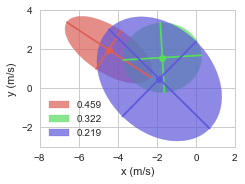

In [56]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [57]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAADnCAYAAADl9EEgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztfXmUI2d176+qtEvdrV5nepF684w3sI1xgokNL2dYHDgv
AWIPa0iwHZuwhOMEGxsCxpCJ7QRMAjYY4pdHwJwEB3NCFoITs4flEZbMEHvG23RPS61udUstqbUv
tbw/1N+nr6qrpFK1tp7R75w5061WlT5J9at7v3t/915OURQFffTRR8+B7/YC+uijD330ydlHHz2K
Pjn76KNH0SdnH330KPrk7KOPHkWfnH300aPok7OPPnoUfXL20UePok/OPvroUfTJ2UcfPYo+Ofvo
o0fRJ2cfffQo+uTso48eRZ+cffTRo+iTs48+ehR9cvbRR4+iT84++uhR9MnZRx89ij45++ijR9En
Z5chyzIKhQIqlQr67Zz6YMH1G3x1D8lkEpIkwel0Ip/PI5lMIhAIgOd52Gw22Gw2cBzX7WX20SXY
ur2AcxGyLEOSJGQyGRSLRciyDEEQUKlUIEkSZFlGpVIBx3Hgeb5P1nMUfcvZYUiSBFEUIYoilpeX
IYoiJiYmkM1mkc1mAQButxtutxsejwculwscx1GXVxCEPlnPEfQtZ4egKAokSYIkSSgUCgiHwxAE
AX6/H4ODg7DZbKhUKpienkahUEA+n8fm5iYqlQpcLhc8Hg/cbjdcLhe1rECNrHa7HYIg9Ml6FqFP
zg5AlmWIoghJkpBIJBCLxTA1NYVyuQxRFAGAWkdBEODz+eDz+QBULW0+n0ehUMDGxgZEUVRZVqfT
2SfrWYo+OdsMSZJQqVQgiiIikQgkScLi4iIcDgfi8XjD4wVBwMDAAAYGBgAAoihSyxqNRilZiWXV
I6sgCLDZbH2y7jP0ydkmKIpCrWUul8Pq6ir8fj8OHDigIkizW36bzWZI1lQqBUmSKFk9Hg8cDgdk
WUa5XEYqlYLL5aJudJ+svY0+OdsA1o2NxWJIJpOYmZmhrioBSww26NMM9Miaz+cpWWVZpmTN5/MA
qgGncrkMjuNUAaY+WXsLfXK2GISU5XIZq6ur4Hke5513Hmy2znzUNpsNg4ODGBwcBABUKhVqWcne
tVAoUMtqt9vBcVyfrD2IPjlbBNaNTafTWFtbw9jYGMbGxgwvcKvWshnY7XbY7XZKVofDAUEQUCgU
kEgkoCgK3a/2ydpb6JOzBSC5S0mSsLGxgUwmg9nZWXg8nobHEnJ2gqhANUA0NDSEoaEhKIqisqxb
W1vgOE4VYLLb7QDQJ2sX0CfnHqAoClKpFAqFArxeL8LhMFwuF8477zwIgtDw+G5f2BzHweFwwOFw
qMhKXOB4PA6O41SWFai67lqy2u128Dzf9fd0NqFPTosgQZ9isYhUKoXNzU0cOHAAw8PD+/YCZcnq
9/tVZM3lcojH4+B5XmVZATVZSd52cHCwT9Y9ok9OC2AleMlkEqVSCQsLC3C5XE2dh3VlO+XWNgM9
spbLZeTzeWSzWWxubkIQBJVlzWQyqFQq1OXtW1br6JOzCbBBHyLBczqd8Hq9TRNzP4LjODidTjid
TgwPD6vImslksLm5SQmZzWZ1LSsriuiTtT765DQJNne5tbWFeDyO6elpANXSLyvgOA6yLKNUKgFo
XpDQbeiRNRaLoVQqIZ1OY2NjAzabTSWKAEC3AzzP98laB31ymgAhZaVSwerqKhRFoRK8dDpt+bys
BZZlGYqiIJFIUM3sfrtQiWV0u90YGxuDoigolUrI5/PY3t6mZCVEZS1rqVQCx3GUpCQafC6jT846
YN3YbDaLSCSC4eFhTExMUOJY3Svm83lsbGyA53ksLCygVCohHA5DFMVdmlkiw9srWTttmTmOg8vl
gsvlwsjICBRFQbFYRKFQQCqVQjQahd1u3xVgIqQ+18naJ6cBiHicSPBSqZShBK+Zi15RFMTjccTj
cQwPD6NUKtGLDwAmJiYAqGV4yWSSigVYZY8VtNsaK4pSV3RBKmpYshKp4fr6OhwOhyrAJIoiJStx
g88VsvbJqQFbd1kulxEOh2Gz2QwleM2Qk1SmiKKIxcVFlEolFItF3efqyfDY/COb0vB4PB2TBzZC
PXJqwZIVqN4QiWVNJpNYX1+H0+lUWVZFUaAoClZWVuD3+zEwMHDWkrU3vtEeAQn6yLKM7e1trK+v
Y3x8HKOjo3uW4OXzeYTDYQwNDSEYDILjOBoIMgO73a5S9mijpNq9XDcvVKvWmed5+h5GR0cpWfP5
PBKJBIrFIpxOJzweD0qlEk1pna2WtU/OHbASvPX1deTzeczNzdG7ulWwbuz09DS1hOzfgeYssF6U
lARe2L0cS1ae70yjxWYsZyOwZAWgImulUsH6+jpcLpeqpQuxrGcDWc95chLyuN1uSJKEcDgMt9uN
xcVF0xI8I1Jp3ViHw7Hr2FZAL/BC9LLE4rhcLkiSBLvd3lICdRIsWXO5HMbHx6EoCnX1S6XSrpYu
+5ms5zQ5iRsbjUYxODiIZDKJgwcPYnh42PQ5jMip58bqgVw8rQTRw7IWp1AoIBaLIZ1O06Jr8pxW
pm06RXzS0oWIQIDa+8zn84jFYiiXy6r3WY+srYiGtxrnLDmJC0tkeOl0GgsLC3A6nU2dR0vORm6s
9ljyfzvlezzPw+v1Ip1Ow+v1wuv1GrY6aVXapt3QuwmQ90nISvLIhUIBm5ubKJfLquCSEVkFQaCl
c93EOUdONneZz+exuroKjuMwNTXVNDHZcwKN3dh6x3YS2iZiet0TrKZtOmk5G72OXrM0clMizdK0
HgQR+xMFkyzL4DgOXq8Xsix3NCp+TpGT5C5lWUY8HkcikcD09LSpRltGIBeIWTdW79huo1HahnWT
eyVtY+UmUK+zIetBsJ0NSVf+QqGAra0tXHjhhe14O7ro/qfcAbC5SyLBA4DFxUXY7XZsbW3tyYJJ
koSVlZWGbmw9kAutF4I1ZtM25CJmAyu9ZDkbwUxnQ6L7jcViuwQoRpBlGXfddReefvppOBwOHDt2
DLOzs/Tv3/72t/HpT38aNpsN1157LV7/+tdDkiR88IMfxPLyMjiOw0c+8pGzn5xs7jKTyWBtbQ0j
IyMYHx/fswSPuLGyLOPw4cOm3FgWvVgmpkW9tA3Ry7Jpm069n3bcBPSapW1sbGB7ext33HEHMpkM
XvziF+MP//APcfjwYcPzfPOb30S5XMYjjzyC48eP495778WDDz4IoOqV3HPPPXj00Ufhdrvxpje9
CUeOHMHx48cBAF/+8pfxk5/8BH/5l395dpOTzV1ubm4inU4jEAjQgAGBFZIQN3ZgYAD5fL5pYnYD
rSCOUdqG9CQqFAool8sol8vUurbDknbCQpORF5OTk/jSl76EcDiMWCzWMPf985//HC95yUsAAJdd
dhmeeOIJ+rfTp08jGAxiaGgIAPDCF74QP/3pT/GqV70Kv/7rvw4AWFtbq7Yvbc/b6i5YN5YIyh0O
h2H7kGbIqY3Ger1epFIpS+vkOA6SJGF5eVnVq0cbmPLmXoic9+eWXkPvNVsJdj86OjqK1dVVGgUl
6Qw2EtyKtA0r3Gg3FEWhgaGJiQlceeWVDY/JZrMqF1gQBIiiCJvNhmw2Sy0zAHi9Xjojx2az4fbb
b8fjjz+OT33qU2cfOVk3lqhlJiYmMDIysmcJnl40lpR6NQtFUZBMJul8FFEUkc1maTtNcjHzyhXw
Cr6WErSdIJZVL0LaqrRNJ/fl5LVkWTatsvL5fMjlcvR3Nsqr/Vsul1OR9c///M9x66234vWvf/3Z
NTyXHX2wurqKeDyO+fn5utpYwBw58/k8Tp8+DafTiYWFBerGWnGJJUlCKBRCLpeD3W7HwMAAhoaG
wHEc5ubmMDU

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH9dJREFUeJztnX1QVNf9/9/LLisoKD4groqC+BDJF+MDmjpNtWI00TFR
SlEJodOR0dTGJEZjFQNoExSjjU4bNInOWBWkEM1M1abjxPhEm0xM0J8JcQMqCPJUQAVdEAGX/f2x
3su9d+/D7rrs3sXPa4YZ2bv3nrPIi8/nnHvu52gsFosFBEGoDh9Pd4AgCHFIToJQKSQnQagUkpMg
VArJSRAqheQkCJWi83QHlLh48aKnu0ConClTpsgev3z5NMzmINFjer0eUVFR3dGtx0b1cgJA/p/P
ur1Nk8mEwMBAt7erhBr75ck+Ldk0S/E9ZnMQQkdsFT1WeXOjq7vkMiitJQiVQnIShEohOQlCpZCc
BKFSSE6CUCkkJ0GoFJKTIFSKV9znJAhP0dnZic2bN6OkpAR6vR4ZGRkYOXIke/zMmTPYvXs3dDod
4uLisHjxYpjNZqSmpuLGjRvQaDT485//jLFjx6KiogIbNmyARqPBmDFjsGnTJvj4SMdHipwEIcNX
X32F9vZ25OfnY+3atdi2bRt7rKOjA5mZmdi/fz+ys7ORn5+PW7du4exZ66KZvLw8rF69Grt27QIA
ZGZmYvXq1cjNzYXFYsHp06dl2yY5CUKGixcv4le/+hUAYOLEifjpp5/YY6WlpRgxYgT69esHvV6P
KVOm4Pvvv8fzzz+P999/HwBQU1ODvn37AgCuXLmCadOmAQBmzJiBb775RrZtSmuJJ4LG9qtOndfc
3IyAgAD2e61Wi4cPH0Kn06G5uZm3bLFPnz5obm4GAOh0Oqxfvx6nTp3C3/72NwCAxWKBRqNh32sy
mWTbJjmJJ4JKPCf6en+F8wICAtDS0sJ+39nZCZ1OJ3qspaWFJ+sHH3yAd955B4sXL8YXX3zBG1+2
tLSwEVUKSmsJQobJkyejoKAAAHD58mWMHTuWPRYREYGKigo0NTWhvb0dhYWFmDRpEv75z3/i008/
BQD4+/tDo9HAx8cHkZGRuHDhAgCgoKAA0dHRsm1T5CQIGebMmYOvv/4aS5cuhcViwdatW3HixAnc
v38fS5YswYYNG5CcnAyLxYK4uDiEhIRg7ty5SElJQWJiIh4+fIiNGzfCz88P69evR1paGnbu3IlR
o0bhhRdekG2b5CQIGXx8fPDee+/xXouIiGD/HRMTg5iYGN7x3r17469//avNtcLDw5GTk2N/2w72
lSAIN0FyEoRKITkJQqWQnAShUkhOglApJCdBqBSSkyBUCt3nJJ4Iqu5XiL6utHzPk/QoOUvrWpTf
9IiIkD7d2BNCbTRafunpLjiM18vJFTIiKtT+84oqRV8naQm14BE5Y2Nj2cdwhg8fjszMTIev4ayU
cueUFlWy1zWbLai/z2nDQWntjeL0x4CQwu1ytrW1wWKxIDs72+lrML/4zkgpB/d6JlMzAgOtf0C4
0jp7PSnEIjgJSwAekLO4uBitra1YtmwZHj58iDVr1mDixIl2n99dYsrRnW0Jry32h4BkfTJxu5x+
fn5ITk5GfHw8ysvLsXz5cpw8eZJ9gFUM7hPjZrMFhohBMJmaJd9f/qDd6f6F+ek57Uq30V0MDuPP
H9aW3sLVmnvs94ZAjeIT9J5AjX3ydtwuZ3h4OEaOHAmNRoPw8HAEBQWhoaEBBoNB8hzm6fLSuhaM
nSgdxYx37gKwlpKIeEr6elKUFteissMMADCbzdBqtQCAyAH9HL6Wqwic2FUio7SoErUma7/UFE3V
uPNZT8Dtch49ehRXr17F5s2bUVdXh+bmZgQHByuepzTmY8R0RkoG7rnML1xpcS17bQZPyRoRFQqT
qRn15Y1d6b2KJCVci9vl/O1vf4uUlBQkJCRAo9Fg69atsiktF6mxn5yYRU23He5jVNDArjYF1xST
9XFxVHbm58CMT0nQnonb5dTr9fjwww9ddj0pMblSjh412KFrFpXV46HZDF1T19iVEfZxIrMYjxOZ
I6JCeRNIJKnrcaaodEdHBzZu3Ijq6mq0t7dj5cqVmD17NnvOiRMnkJOTg/z8fNm2vWIRglJKKyWm
UMoiU4N9DQZrEIYAdhx1vazeJgJzo+vjIBeZ7ZGUomj3wi0qffnyZWzbtg0ff/wxgK6i0kePHoW/
vz8SEhIQExOD8+fPIygoCDt27EBTUxMWLVrEymk0GnH06FFYLBbFtr1CTkA8pRVLL8XE5Eo5LlR5
fFtS2YDr5mboTA+sLwRrEBXIP6+orF703MeVlpHVGUlJUGmumWpEX5+hcJ69RaUBsEWlX3zxRbZ4
l8ViYScWGxsbsXPnTmzcuBFpaWmKffYaOaXgRh6hmFJS/vCgTv6iwcCojq7IWVLZwLtWVGCwaKos
FmHlkBOZ+7mMxbUAlCUlQaXRIsqp85wpKt2nTx/23DfffBOrV6+G2WzGu+++i5SUFPTq1cuutr1e
TiFCaaSkHG+QH4f+VFUL7YP71m8eXeIZvxAAQFElPz1moqojY1tHUuWIpwxsJDWbzYiSuWvBTXMB
Goc+Ls4Wla6trcXrr7+OV155BS+99BJ+/PFHVFRUYPPmzWhra8P169exZcsWvPvuu5Jt9zg5GYTj
S0ZMrpTGjmrJ8zsHPYSPVodI32EAgJ9r67vkDu4SFbCVlUGYCnMRisyVVUxSJpJevVIF4527FEXd
xOTJk3H27FnMnz9ftqh07969UVhYiOTkZNy6dQvLli1Deno6pk+fDgCYMGECvvjiCwBAVVUV1qxZ
Iysm0IPlBLqiplBMRspImfurJpMJlQ8edAk8COKiAngmNETsEg5Jy8iqJKlhRD8EBgbaleqSoI+P
M0WlMzIycO/ePezZswd79uwBAOzbtw9+fn4Ota2x2DNt5EEuXryIrX/8l+SEEBNRippu24w1x4UG
i4oplLLOUmpzbfNDM7Q660A+RGMtImxs4MvGlVUIN7JyKZFIiYVc50w4cSXlrsYptXMsWlpU2a1y
enKF0JJNszBlyhTZ91y8eBEH8L3osd9jquL5nqLHRM6ooIEoKqtnBeWONYURk4ErZWR/vkzMUynG
xjr2fQMH8UUVi6qAbWQFumQVzhYz0VUoqTCSSqW6zFjUnghK0dO76DFy2gsTNRnhuFKaUcT+u1dv
M8zQYlx//kyfsbFLVIArK0d8gawA8EMtJw3mRFVGVjlJualumFbPO85kDvakuZTeehdeI2dpUaXL
H91ixORKOSZwKACg2WRCwKNU7Zqp6zhXVruiKqyicieixEQdFxrMu2XDlZQbRa+3t2ISbFNIJopK
QeNP78Mr5IwI6ePww84llQ2SCw7qLKU2aSwjpRjCY4ys4x493dUlq62oAD+qckVl0l9hystIKhZF
i6/Vyqa5xuJayejJCEp4B14hpxylxbU2S+CiAoMVl+oZG+tsBGXor/kaffuYodVoRY+PCewqFnXN
VMNGXn5U5Yxng20jKiMpd3xqTxQdNiQAdQ2tkoICsOtWC6F+vKpurfCvvr2/gMLZVG5UM6OIFxn7
a74GAAxAMIb3HmnzxbyH+ZrW9wbGBA5lr2FGEcwoQmT/EFb+OkupNVoHB7NjXkbS8YbBbCTlTiKN
Cw3uGo8K/tCws9Iiq5FcvTCf8BxeI6e946TrgjWvUrc0xGDEZCQUQ05WrqiMpOP614tKCvBnj8UE
BaAoqBRSj7VFRIU6VQ+JcD9eI6cczESIMM0T3lMEbO9VAtKLohlC8V/RLwCSogqjqTCSMlHUEUHF
oOhpH8bGOtEvNeN1ctqb2gonU36urbe5vWFsrOPdJpErPNxfP5b3BUBSVKArCnMFBWzvp9orKOB4
9CS6CNFEiH6

## Goodness-of-fit Statistics

In [58]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.992  0.015      0.057     1071.465  3.057131e-07      0.017       0.192

In [59]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [60]:
sample, points = SPEED_SET, FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [61]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.765011919381184
     jac: array([  1.33022621e+01,  -2.38418579e-07,  -7.15255737e-07,
        -7.15255737e-07,  -2.38418579e-07,  -2.38418579e-07,
         1.33022592e+01,  -2.38418579e-07,  -4.76837158e-07,
        -4.76837158e-07,   0.00000000e+00,  -7.15255737e-07,
         1.33022616e+01,  -4.76837158e-07,  -7.15255737e-07,
        -2.38418579e-07,  -2.38418579e-07,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1646
     nit: 80
    njev: 80
  status: 0
 success: True
       x: array([ 0.45577549, -3.49305581,  1.05737242,  2.87657658,  2.28394059,
       -0.62979676,  0.1567239 , -4.90945667,  2.57874996,  1.66226714,
        1.32379791, -0.52142559,  0.38750061, -1.68844885,  1.79061878,
        2.28344332,  1.95184654,  0.02755391])

## 6.1 GMM Result

In [62]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.456  -3.493  1.057  2.877  2.284  -0.630
2  0.388  -1.688  1.791  2.283  1.952   0.028
3  0.157  -4.909  2.579  1.662  1.324  -0.521

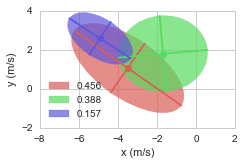

In [63]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [64]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.999  0.009     11.507  9679102412.509  5.236581e-08      0.007   

  RMSE / Mean  
0       0.080

In [65]:
# Empirical Power
gofs_mean_set_bivar

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.188984   1356.965049  0.053012  8.430751e-07    0.028478   
(1991, 1996)         NaN           NaN       NaN           NaN         NaN   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.318796  0.976964  
(1991, 1996)          NaN       NaN

In [66]:
%%time
if df_all_years.index.year[0] <= 2000:
    # GMM test against previous data
    fig1, ax1 = plt.subplots(figsize=(3,2.5))
    fig2, ax2 = plt.subplots(figsize=(3,2.5))
    gofs_mean_set_bivar_previous = []
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    for year_length in [10]:
        color = next(prop_cycle)
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
           for sub_start_year in arange(start_year, end_year+1)) 
        gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
        gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
        gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
        gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
        gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar_previous.append(gofs_mean)

    print('10 year comparison')
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    align_figures()
    display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

Wall time: 35 ms


In [67]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAADnCAYAAADl9EEgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztvXm4LGV1Lv5WVc/de+/e4zl76D1yDgEMIM5X8ebBgehN
YgggoiFRCPhToyERBAwiJidAIuCAgl7u/WnUXyIRbsxgwhOcY/QhiPccAwcBzx562FP37nms7qr6
/dH7+/ZX1VXd1bV72uf0+zznObuHGrq73lrrW+tda3GKoijoo48+eg58t0+gjz760EefnH300aPo
k7OPPnoUfXL20UePok/OPvroUfTJ2UcfPYo+Ofvoo0fRJ2cfffQo+uTso48eRZ+cffTRo+iTs48+
ehR9cvbRR4+iT84++uhR9MnZRx89ij45++ijR9EnZx999Cj65Oyjjx5Fn5x99NGj6JOzjz56FH1y
dhmyLKNQKKBcLqPfzqkPFly/wVf3kEgkIEkSnE4n8vk8EokEAoEAeJ6HzWaDzWYDx3HdPs0+ugRb
t0/gTIQsy5AkCZlMBsViEbIsQxAElMtlSJIEWZZRLpfBcRx4nu+T9QxF33J2GJIkoVKpoFKpYGVl
BZVKBRMTE8hms8hmswAAt9sNt9sNj8cDl8sFjuOoyysIQp+sZwj6lrNDUBQFkiRBkiQUCgWEQiEI
ggC/34/BwUHYbDaUy2VMT0+jUCggn89je3sb5XIZLpcLHo8HbrcbLpeLWlZgj6x2ux2CIPTJehqh
T84OQJZlVCoVSJKEeDyOaDSKqakpiKKISqUCANQ6CoIAn88Hn88HoGpp8/k8CoUCtra2UKlUVJbV
6XT2yXqaok/ONkOSJJTLZVQqFUQiEUiShKWlJTgcDsRisYbbC4KAgYEBDAwMAAAqlQq1rJubm5Ss
xLLqkVUQBNhstj5ZDxj65GwTFEWh1jKXyyEcDsPv9+PQoUMqgjS75LfZbIZkTSaTkCSJktXj8cDh
cECWZYiiiGQyCZfLRd3oPll7G31ytgGsGxuNRpFIJDAzM0NdVQKWGGzQpxnokTWfz1OyyrJMyZrP
5wFUA06iKILjOFWAqU/W3kKfnC0GIaUoigiHw+B5HmeddRZsts581TabDYODgxgcHAQAlMtlalnJ
2rVQKFDLarfbwXFcn6w9iD45WwTWjU2n01hfX8fY2BjGxsYML3Cr1rIZ2O122O12SlaHwwFBEFAo
FBCPx6EoCl2v9snaW+iTswUguUtJkrC1tYVMJoO5uTl4PJ6G2xJydoKoQDVANDQ0hKGhISiKorKs
Ozs74DhOFWCy2+0A0CdrF9An5z6gKAqSySQKhQK8Xi9CoRBcLhfOOussCILQcPtuX9gcx8HhcMDh
cKjISlzgWCwGjuNUlhWouu5astrtdvA83/XPdDqhT06LIEGfYrGIZDKJ7e1tHDp0CMPDwwf2AmXJ
6vf7VWTN5XKIxWLgeV5lWQE1WUnednBwsE/WfaJPTgtgJXiJRAKlUgmLi4twuVxN7Yd1ZTvl1jYD
PbKKooh8Po9sNovt7W0IgqCyrJlMBuVymbq8fctqHX1yNgE26EMkeE6nE16vt2liHkRwHAen0wmn
04nh4WEVWTOZDLa3tykhs9msrmVlRRF9stZHn5wmweYud3Z2EIvFMD09DaBa+mUFHMdBlmWUSiUA
zQsSug09skajUZRKJaTTaWxtbcFms6lEEQDocoDn+T5Z66BPThMgpCyXywiHw1AUhUrw0um05f2y
FliWZSiKgng8TjWzB+1CJZbR7XZjbGwMiqKgVCohn88jlUpRshKispa1VCqB4zhKUhINPpPRJ2cd
sG5sNptFJBLB8PAwJiYmKHGsrhXz+Ty2trbA8zwWFxdRKpUQCoVQqVRqNLNEhrdfsnbaMnMcB5fL
BZfLhZGRESiKgmKxiEKhgGQyic3NTdjt9poAEyH1mU7WPjkNQMTjRIKXTCYNJXjNXPSKoiAWiyEW
i2F4eBilUolefAAwMTEBQC3DSyQSVCzAKnusoN3WWFGUuqILUlHDkpVIDTc2NuBwOFQBpkqlQslK
3OAzhax9cmrA1l2KoohQKASbzWYowWuGnKQypVKpYGlpCaVSCcViUfe9ejI8Nv/IpjQ8Hk/H5IGN
UI+cWrBkBao3RGJZE4kENjY24HQ6VZZVURQoioK1tTX4/X4MDAyctmTtjV+0R0CCPrIsI5VKYWNj
A+Pj4xgdHd23BC+fzyMUCmFoaAizs7PgOI4GgszAbrerlD3aKKl2LdfNC9WqdeZ5nn6G0dFRStZ8
Po94PI5isQin0wmPx4NSqURTWqerZe2TcxesBG9jYwP5fB7z8/P0rm4VrBs7PT1NLSH7OtCcBdaL
kpLAC7uWY8nK851ptNiM5WwElqwAVGQtl8vY2NiAy+VStXQhlvV0IOsZT05CHrfbDUmSEAqF4Ha7
sbS0ZFqCZ0QqrRvrcDhqtm0F9AIvRC9LLI7L5YIkSbDb7S0lUCfBkjWXy2F8fByKolBXv1Qq1bR0
OchkPaPJSdzYzc1NDA4OIpFI4PDhwxgeHja9DyNy6rmxeiAXTytB9LCsxSkUCohGo0in07Tomryn
lWmbThGftHQhIhBg73Pm83lEo1GIoqj6nPXI2opoeKtxxpKTuLBEhpdOp7G4uAin09nUfrTkbOTG
arcl/7dTvsfzPLxeL9LpNLxeL7xer2Grk1albdoNvZsA+ZyErCSPXCgUsL29DVEUVcElI7IKgkBL
57qJM46cbO4yn88jHA6D4zhMTU01TUx2n0BjN7betp2EtomYXvcEq2mbTlrORsfRa5ZGbkqkWZrW
gyBif6JgkmUZHMfB6/VCluWORsXPKHKS3KUsy4jFYojH45ienjbVaMsI5AIx68bqbdttNErbsG5y
r6RtrNwE6nU2ZD0ItrMh6cpfKBSws7ODc845px0fRxfd/5Y7ADZ3SSR4ALC0tAS73Y6dnZ19WTBJ
krC2ttbQja0HcqH1QrDGbNqGXMRsYKWXLGcjmOlsSHS/0Wi0RoBiBFmWceedd+L555+Hw+HAsWPH
MDc3R1//7ne/i89//vOw2Wy4/PLL8fa3vx2SJOH222/HysoKOI7DJz7xidOfnGzuMpPJYH19HSMj
IxgfH9+3BI+4sbIs4+jRo6bcWBa9WCamRb20DdHLsmmbTn2edtwE9JqlbW1tIZVK4dZbb0Umk8Fr
XvMafPCDH8TRo0cN9/Ptb38boijikUcewfHjx3HPPffgoYceAlD1Su6++248+uijcLvduPrqq3HJ
JZfg+PHjAICvf/3rePLJJ/GpT33q9CYnm7vc3t5GOp1GIBCgAQMCKyQhbuzAwADy+XzTxOwGWkEc
o7QN6UlUKBQgiiJEUaTWtR2WtBMWmoy8mJycxNe+9jWEQiFEo9GGue+nn34aF198MQDgwgsvxDPP
PENfO3XqFGZnZzE0NAQAeNnLXoannnoKb3nLW/Brv/ZrAID19fVq+9L2fKzugnVjiaDc4XAYtg9p
hpzaaKzX60UymbR0nhzHQZIkrKysqHr1WA1MmT1mq/fHqnrC4TCNgpJ0BhsJbkXahhVutBuKotDA
0MTEBF796lc33CabzapcYEEQUKlUYLPZkM1mqWUGAK/XS2fk2Gw23HLLLXjiiSfw2c9+9vQjJ+vG
ErXMxMQERkZG9i3B04vGklKvZqEoChKJBJ2PUqlUkM1maTtNNgDT68lyFsSy6kVIW5W26eS6nBxL
lmXTKiufz4dcLkcfs1Fe7Wu5XE5F1r/8y7/ETTfdhLe//e2nFzlZN3Z9fR3FYhELCwsNuxSYIadR
NNaKSyxJEsLhMMrlMux2OwYGBiDLMra3tzE/P09TG6RguVtSPCvQfhfNpG3cbrfp9FOnyElIWS6X
TX/vF110Eb7

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH9dJREFUeJztnX1QVNf9/9/LLisoKD4groqC+BDJF+MDmjpNtWI00TFR
SlEJodOR0dTGJEZjFQNoExSjjU4bNInOWBWkEM1M1abjxPhEm0xM0J8JcQMqCPJUQAVdEAGX/f2x
3su9d+/D7rrs3sXPa4YZ2bv3nrPIi8/nnHvu52gsFosFBEGoDh9Pd4AgCHFIToJQKSQnQagUkpMg
VArJSRAqheQkCJWi83QHlLh48aKnu0ConClTpsgev3z5NMzmINFjer0eUVFR3dGtx0b1cgJA/p/P
ur1Nk8mEwMBAt7erhBr75ck+Ldk0S/E9ZnMQQkdsFT1WeXOjq7vkMiitJQiVQnIShEohOQlCpZCc
BKFSSE6CUCkkJ0GoFJKTIFSKV9znJAhP0dnZic2bN6OkpAR6vR4ZGRkYOXIke/zMmTPYvXs3dDod
4uLisHjxYpjNZqSmpuLGjRvQaDT485//jLFjx6KiogIbNmyARqPBmDFjsGnTJvj4SMdHipwEIcNX
X32F9vZ25OfnY+3atdi2bRt7rKOjA5mZmdi/fz+ys7ORn5+PW7du4exZ66KZvLw8rF69Grt27QIA
ZGZmYvXq1cjNzYXFYsHp06dl2yY5CUKGixcv4le/+hUAYOLEifjpp5/YY6WlpRgxYgT69esHvV6P
KVOm4Pvvv8fzzz+P999/HwBQU1ODvn37AgCuXLmCadOmAQBmzJiBb775RrZtSmuJJ4LG9qtOndfc
3IyAgAD2e61Wi4cPH0Kn06G5uZm3bLFPnz5obm4GAOh0Oqxfvx6nTp3C3/72NwCAxWKBRqNh32sy
mWTbJjmJJ4JKPCf6en+F8wICAtDS0sJ+39nZCZ1OJ3qspaWFJ+sHH3yAd955B4sXL8YXX3zBG1+2
tLSwEVUKSmsJQobJkyejoKAAAHD58mWMHTuWPRYREYGKigo0NTWhvb0dhYWFmDRpEv75z3/i008/
BQD4+/tDo9HAx8cHkZGRuHDhAgCgoKAA0dHRsm1T5CQIGebMmYOvv/4aS5cuhcViwdatW3HixAnc
v38fS5YswYYNG5CcnAyLxYK4uDiEhIRg7ty5SElJQWJiIh4+fIiNGzfCz88P69evR1paGnbu3IlR
o0bhhRdekG2b5CQIGXx8fPDee+/xXouIiGD/HRMTg5iYGN7x3r17469//avNtcLDw5GTk2N/2w72
lSAIN0FyEoRKITkJQqWQnAShUkhOglApJCdBqBSSkyBUCt3nJJ4Iqu5XiL6utHzPk/QoOUvrWpTf
9IiIkD7d2BNCbTRafunpLjiM18vJFTIiKtT+84oqRV8naQm14BE5Y2Nj2cdwhg8fjszMTIev4ayU
cueUFlWy1zWbLai/z2nDQWntjeL0x4CQwu1ytrW1wWKxIDs72+lrML/4zkgpB/d6JlMzAgOtf0C4
0jp7PSnEIjgJSwAekLO4uBitra1YtmwZHj58iDVr1mDixIl2n99dYsrRnW0Jry32h4BkfTJxu5x+
fn5ITk5GfHw8ysvLsXz5cpw8eZJ9gFUM7hPjZrMFhohBMJmaJd9f/qDd6f6F+ek57Uq30V0MDuPP
H9aW3sLVmnvs94ZAjeIT9J5AjX3ydtwuZ3h4OEaOHAmNRoPw8HAEBQWhoaEBBoNB8hzm6fLSuhaM
nSgdxYx37gKwlpKIeEr6elKUFteissMMADCbzdBqtQCAyAH9HL6Wqwic2FUio7SoErUma7/UFE3V
uPNZT8Dtch49ehRXr17F5s2bUVdXh+bmZgQHByuepzTmY8R0RkoG7rnML1xpcS17bQZPyRoRFQqT
qRn15Y1d6b2KJCVci9vl/O1vf4uUlBQkJCRAo9Fg69atsiktF6mxn5yYRU23He5jVNDArjYF1xST
9XFxVHbm58CMT0nQnonb5dTr9fjwww9ddj0pMblSjh412KFrFpXV46HZDF1T19iVEfZxIrMYjxOZ
I6JCeRNIJKnrcaaodEdHBzZu3Ijq6mq0t7dj5cqVmD17NnvOiRMnkJOTg/z8fNm2vWIRglJKKyWm
UMoiU4N9DQZrEIYAdhx1vazeJgJzo+vjIBeZ7ZGUomj3wi0qffnyZWzbtg0ff/wxgK6i0kePHoW/
vz8SEhIQExOD8+fPIygoCDt27EBTUxMWLVrEymk0GnH06FFYLBbFtr1CTkA8pRVLL8XE5Eo5LlR5
fFtS2YDr5mboTA+sLwRrEBXIP6+orF703MeVlpHVGUlJUGmumWpEX5+hcJ69RaUBsEWlX3zxRbZ4
l8ViYScWGxsbsXPnTmzcuBFpaWmKffYaOaXgRh6hmFJS/vCgTv6iwcCojq7IWVLZwLtWVGCwaKos
FmHlkBOZ+7mMxbUAlCUlQaXRIsqp85wpKt2nTx/23DfffBOrV6+G2WzGu+++i5SUFPTq1cuutr1e
TiFCaaSkHG+QH4f+VFUL7YP71m8eXeIZvxAAQFElPz1moqojY1tHUuWIpwxsJDWbzYiSuWvBTXMB
Goc+Ls4Wla6trcXrr7+OV155BS+99BJ+/PFHVFRUYPPmzWhra8P169exZcsWvPvuu5Jt9zg5GYTj
S0ZMrpTGjmrJ8zsHPYSPVodI32EAgJ9r67vkDu4SFbCVlUGYCnMRisyVVUxSJpJevVIF4527FEXd
xOTJk3H27FnMnz9ftqh07969UVhYiOTkZNy6dQvLli1Deno6pk+fDgCYMGECvvjiCwBAVVUV1qxZ
Iysm0IPlBLqiplBMRspImfurJpMJlQ8edAk8COKiAngmNETsEg5Jy8iqJKlhRD8EBgbaleqSoI+P
M0WlMzIycO/ePezZswd79uwBAOzbtw9+fn4Ota2x2DNt5EEuXryIrX/8l+SEEBNRippu24w1x4UG
i4oplLLOUmpzbfNDM7Q660A+RGMtImxs4MvGlVUIN7JyKZFIiYVc50w4cSXlrsYptXMsWlpU2a1y
enKF0JJNszBlyhTZ91y8eBEH8L3osd9jquL5nqLHRM6ooIEoKqtnBeWONYURk4ErZWR/vkzMUynG
xjr2fQMH8UUVi6qAbWQFumQVzhYz0VUoqTCSSqW6zFjUnghK0dO76DFy2gsTNRnhuFKaUcT+u1dv
M8zQYlx//kyfsbFLVIArK0d8gawA8EMtJw3mRFVGVjlJualumFbPO85kDvakuZTeehdeI2dpUaXL
H91ixORKOSZwKACg2WRCwKNU7Zqp6zhXVruiKqyicieixEQdFxrMu2XDlZQbRa+3t2ISbFNIJopK
QeNP78Mr5IwI6ePww84llQ2SCw7qLKU2aSwjpRjCY4ys4x493dUlq62oAD+qckVl0l9hystIKhZF
i6/Vyqa5xuJayejJCEp4B14hpxylxbU2S+CiAoMVl+oZG+tsBGXor/kaffuYodVoRY+PCewqFnXN
VMNGXn5U5Yxng20jKiMpd3xqTxQdNiQAdQ2tkoICsOtWC6F+vKpurfCvvr2/gMLZVG5UM6OIFxn7
a74GAAxAMIb3HmnzxbyH+ZrW9wbGBA5lr2FGEcwoQmT/EFb+OkupNVoHB7NjXkbS8YbBbCTlTiKN
Cw3uGo8K/tCws9Iiq5FcvTCf8BxeI6e946TrgjWvUrc0xGDEZCQUQ05WrqiMpOP614tKCvBnj8UE
BaAoqBRSj7VFRIU6VQ+JcD9eI6cczESIMM0T3lMEbO9VAtKLohlC8V/RLwCSogqjqTCSMlHUEUHF
oOhpH8bGOtEvNeN1ctqb2gonU36urbe5vWFsrOPdJpErPNxfP5b3BUBSVKArCnMFBWzvp9orKOB4
9CS6CNFEiH6

## 6.3 Univariate Goodness-of-fit

In [68]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [69]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)
speed_params = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']

Speed Distribution Comparison
0.998735133021 0.997810434008 0.998765058815
Wall time: 39.1 s


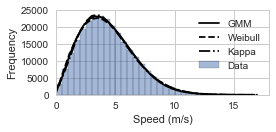

In [70]:
%%time
x = bins = arange(0, max_speed+BIN_WIDTH, BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, density_expected_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, bins, bin_width=BIN_WIDTH)

y_gmm_em  = array([integrate.nquad(f_em, [[x_, x_+BIN_WIDTH],[0, 2*pi]]) 
                   for x_ in x])[:, 0]

# 3. Plot Comparison
df['speed'].hist(bins=bins, alpha=0.5, label='Data')
plot(x[:-1]+BIN_WIDTH/2, density_speed_expected_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text, ylabel='Frequency', 
              legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

density, _ = np.histogram(df['speed'], bins=x, density=True)
R_square_gmm = sector_r_square(density*BIN_WIDTH, density_speed_expected_gmm)
R_square_weibull = sector_r_square(density*BIN_WIDTH, density_expected_weibull)
R_square_gmm_em = sector_r_square(density*BIN_WIDTH, y_gmm_em[:-1])

print(R_square_gmm, R_square_weibull, R_square_gmm_em)

In [71]:
density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
print(sector_r_square(density*BIN_WIDTH, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*BIN_WIDTH, density_expected_beta))

0.998358608016


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


0.996432381085


In [72]:
%%time
# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVGX///HXLAzb4AYKWuK+mykYaoaWSJqVd0oF6o0t
lrf5rW7vzMz6aWamlqktLnWntyZpWrTcYi4lLnSTpoyiEam5IS6ICygMO3N+fxCjpCIihzMMn+fj
0ePRXGc48zkR77nOOdd1Lp2iKApCCFEJeq0LEELUXBIgQohKkwARQlSaBIgQotIkQIQQlSYBIoSo
NFUDZO/evURGRl7VvnnzZsLCwggPD+fLL79UswQhhIqMau34008/Zc2aNbi7u5dpLywsZObMmURH
R+Pu7s6wYcPo168fPj4+apUihFCJaj0Qf39/Pvroo6vaDx8+jL+/P3Xr1sVkMhEYGMiuXbvUKkMI
oSLVeiADBgzgxIkTV7VnZ2fj5eVlf+3p6Ul2dvYN92exWKq0PiFExQUGBl6zXbUAuR6z2YzVarW/
tlqtZQKlPNc7CGdmsVic8rh3H0hn087jpJ234uftSY8O9fji280kJyVy9tRhMtJTyc5Mx3rp/HX3
YXRxxcNcD5tioyDPiovJDReTOyY3TxSDG/Xr+9C6SzAuru4oxUXkZGeSZ3PFt1FD3M11cXMzY3L3
xOjiSlZOEXXNpqs+42J2wTXbm/iYUYDT567+8rvez1Sk3ZqTg6eHR7V9dhMfMxMiu1/VfqXyvryr
PUBatWpFSkoKmZmZeHh4kJCQwKhRo6q7DFFN/hoU/YP8KSoqYu6n33H8oIUTh0oCI896sczP6fR6
vOo1ws2jDoUF+XjWaUDdBn408GtO/YZNaXR7W25r2Qk/b/NN/SG5mYzkFRRd1T7w7uZs33eqwu0h
Qf4ARK1LvuV9afnZpfuqrGoLkJiYGHJycggPD+fVV19l1KhRKIpCWFgYvr6+1VWGqEa7D6QTtS4Z
RVHISD/OnjgLn7y7m5OH95Kfe/UfvU6np06DxnQMGkDHnn/Dy6sOtuJisnKLrxkGjb3NhAT539Qf
0mP92wIQu/M4aRes+DXwJCTIn4B2jWh9e72bai9VFfsqbT+cmkMTH3O1fvat0NWU2bjO2pW/kZpy
3Nfqaaz4dhtxP37H7wk/YL10zv5ecz0/mrcPJCM9FVd3M7e37kbj5h3x8mmO2bOk+35lV75XlybX
DIPIQR0JaNeI3QfSr/mHcb12R+aIv+/yaqr2UxjhfEp7GgC52RdZH/cNc17bQPqJg1e9t31gKN0e
GIdvA4+rtpV+897sN3FAu0bXDIbrtYuqIwEibtmmncc5nZJMQuwXHE3ejs1WXGZ7A9/mdLxrAC07
302DRv7XvQ5RGgoB7Rpd9a0nYeCYJEBEhV3rNKX4UgqLZr7Asd9/AaDhba3p0P1+iouKSEs9SECf
ITRpcQc6nc6+n/KuQ4iaRQJEVMiVpykAiXssfDzrBY4m7yhp0OkwmdwJf2E+RpMrUPaU5HqnHqJm
kwARFbJp53EAMtJT+SnmY4789jMAeoMRW3ER5jre9HpgFHrj5f+lrjwlcRbX6oU50/HdLAkQUSGn
zl5iT9zXxH+/mOKiAgxGE8VFBRiNJt6Y9iZ9Bw3n51/POfUpyV97YafPZdtfV/ZYf/nlF8aNG0fr
1q1RFIXMzEzGjh3LoEGDrvn+U6dOsX//fvr161epz6tqEiDiKn/9lm3nW8x/PxnPsYOJuHvW5d5h
r/LbL+uo3/B2/jbsOV77v/sB6N21ubaFq6y0F/ZXsTuP31JY9uzZk3nz5gEQHx/PnDlzaNGiBR06
dLjqvTt27ODIkSMSIMIxXfktq9hsrP82ite//zdFBXk08G3Go2Pn4eFVnzZ39kGvN/C3/h01rrj6
pJ23Xrv9wrXbK8PNzY3w8HDWrVvH559/TlpaGunp6fTr148XX3yRf//73+Tl5dGtWze8vLyYP38+
iqJgtVrtwVOd5IFCoozSb9lLGWf4+uOX2frthyg2GwBZF07j7WVEr9dxe6O69oFctYWft+e12xtc
u72yvL29SU5OpmvXrixZsoTo6GhWrVqFwWBg9OjRPPTQQ4SEhPDHH38we/ZsoqKiuP/++9mwYUOV
1lER0gMRZaSdt5J2fD9rFr9GTnYGJjdPCvKs1G/YlE0bviMgIEDrEjXT/zrD5m91PslfnTp1im7d
uvHrr7+yY8cOzGYzBQUFV73P19eXt99+Gw8PD86cOaPJ70YCRJRxISWB6AWvU1RYgN5gpCDPSuce
DxLxzMRaHR5w+UKpmuNXcnJy+Oqrr3j00UfJzc1l2rRppKSk8OWXX6IoCnq9HtufPcLJkyfz448/
YjabmThxIlrMSpEAEXYLFiwg6sNX0BtNtOjYk1NHf6X/4y/T5s6+PBDcTuvyHIIat6V37NhBZGQk
er2ezMxMXnjhBVq0aMH48eNJTEzEZDLRrFkz0tPTadu2LYsWLaJTp04MHjyYESNG4O7ujo+PD+np
6VVaV0VIgNRipXdbTp/NwrJpCT+tX0GjRo2YsyCKk9Z6HDp6jLatWjrlLVlH0aNHD7Zv325/feUQ
/jVr1lz1fl9fXzZu3AjAgw8+WD1FlkMCpJYqvdtSVFjAxpUz+GPvNkyuHgx8+DH+/uj9f74rSNMa
heOTAKmlNu08TmFBHt/9eyInj+zD1d1Mfm422+J+orCwEBcXF61LFDWA3MatpU6lX2Td8ml/hocX
+bnZtOjYk8HPvivhISpMeiC1kKIoxP/3A44mb8fF5EZ+bhYd7hpA/8dfpqlvPa3LEzWIBEgtNGnS
JBJ+isHDqwE5WRfoes8Q+g55AZ1OV+VjGoRzkwCpZebNm8c777xD27Zt+XDxl/x76Wqa3RFKYx8v
udsibpoESC1Qert2y8Zv2bBiBvXre7Nx40aaN2/OgOA7tS6v1ktNTWX27NmkpaVRWFhIw4YNmTBh
Ahs2bGDhwoVs3brV/uDx8+fP06dPH9566y2CgoIICQlh/PjxjB492r6/MWPGYLVaiYqKUr12CRAn
V3q79ujvv/DDF+9gMJrIyLjAiuj1vP7yc1qX51AmTJjAV199VaX7fOyxx5g9e/Z1t+fm5vLcc8/x
1ltv0a1bNywWCy4uLkybNo2goCCaN2/O+vXrefLJJwFYt24djRs3tv+8v78/GzdutAdIRkYGKSkp
1bZUrNyFcXKbdh7nfNoxvv9sKgpQXFSAuZ4POS5yrcMRbNmyhZ49e9KtWzd7W5cuXVi+fDkAgwYN
KjNJbsuWLdx333321/Xr18fb25vDhw8DsH79egYOHFhN1UsPxOmlnj7PuuVvUlSQh06vx+TmySPP
vkMeZq1LczizZ88ut7eghhMnTuDvfznM58yZg8FgID09ne7du9O5c2fc3d1JTU3FZrPh5+eHq6tr
mX08+OCDfP/997z44ovExsby0ksvkZCQUC31Sw/Eye34fiHn046hNxjR6wwMfno6Po1bVPkUdFE5
fn5+ZdaQHj9+PFFRUdStW5fi4pKn25cGRExMDA8//PBV++jfvz+bN2/mxIkTNGzYEDc3t2qrXwLE
iX3++eckxK3BzcMLW3ER/cNf5vbWXYGqn4IuKickJITt27eTmJhob0tJSSEtLc3+JPsBAwYQGxtL
QkICPXr0uGofnp6etGjRgtmzZ/PQQw9VW+2g4imMzWZj6tSpHDhwAJPJxPTp02nWrJl9+5o1a1i6
dCl6vZ6wsDCGDx+uVim10v79+xkzZgxeXl4sWbmWb9ZupUmHvk77vNKaytPTk0WLFjFnzhzee+89
Ll68SJ06dZg0aRKHDh0CwMvLCz8/P5o2bYpef+3v/IcffpgpU6Ywd+5cjh07Vn0HoKhk48aNysSJ
ExVFUZQ9e/Y

0.00900369676484 0.0215552164766
1.5 4.5
Wall time: 516 ms


In [73]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

0.011095195654
0.00875334607242


In [74]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = N_VM_DIR

In [75]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [76]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

Direction Distribution Comparison
0.996762415722
0.997855137825


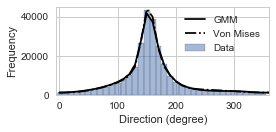

In [77]:
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, density_dir_expected*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', color='black', label='Von Mises')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, density_dir_expected[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

In [78]:
phi = phi_from_speed_dir(df.speed, df.dir, speed_params, dir_params)
phi_data = [cos(phi), sin(phi)]
n_vM_phi = N_VM_PHI

In [79]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [80]:
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

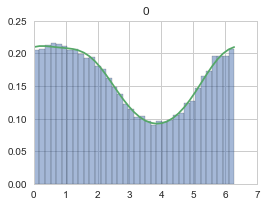

In [81]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x, connection_params)
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

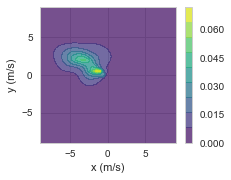

In [82]:
al_pdf = generate_al_pdf_from(speed_params, dir_params, connection_params, cartesian=True)

X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [np.arctan2(y, x) for x,y in coords]
al_pdf_result = al_pdf(x, alpha)
al_Z = al_pdf_result.reshape(XX.shape)

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [83]:
gof_df(al_pdf_result, kde_result, BIN_WIDTH)

D:\我的坚果云\wind_speed_analysis\helpers\app_helper.py:80: RuntimeWarning: divide by zero encountered in true_divide
  Chi_square = sum(error_array/gmm_pdf_result)
D:\我的坚果云\wind_speed_analysis\helpers\app_helper.py:81: RuntimeWarning: divide by zero encountered in true_divide
  Chi_square_2 = sum(power(kde_result/gmm_pdf_result-1, 2))


R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0 -1.139894  0.640        inf          inf  0.000078      0.275       3.077

In [84]:
speed_params, dir_params, connection_params

((0.15250635161465184,
  0.20024323578237405,
  2.2929520956685794,
  3.063548184206577),
 [[31.921938791928415, 2.6705630319321387, 0.26817237759253754],
  [1.8675129412228035, 2.0463582195509606, 0.23650989544757822],
  [0.79596649899378824, -2.0464197089202343, 0.16953010264982499],
  [5.5337919841072036, 2.8030723019847068, 0.32578762431005914]],
 [[1.0577771701700871, -0.24350505685851384, 0.29756264400544491],
  [0.28349508872727874, -0.20483914494284766, 0.26659613815065997],
  [0.82511528993088168, 1.6984672275166435, 0.43584121784389518]])

In [85]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012952  0.998082      0.958188
(1997, 2002)       NaN       NaN           NaN
(1991, 1996)       NaN       NaN           NaN

In [86]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

Wall time: 33 ms


## 6.4 Sectoral Comaprison

In [87]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df), df.speed.max()))

(72.894791543124668, 3.7145835503407878e-05, 949.00538580958914, 52.464511291826007, -0.011424569909656457, 2928155880055770.5, 0.99139868731038039, 0.99182785883751323)
Wall time: 15.6 s


In [88]:
al_params = [speed_params, dir_params, connection_params]

In [89]:
%%time
incre = max(SECTOR_LENGTH, 10)
al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
print(true_R_square(al_density_collection, len(df), df.speed.max()))

(304.90739657636362, 0.00064990975259689653, 949.01494682678049, 186.51938317084776, -0.02701084143583854, 53805.355610745501, 0.84950999415247053, 0.85701885099309572)
Wall time: 5min 28s


In [90]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
gmm_vals=Parallel(n_jobs=-1)(delayed(gmm_weibull_empirical_direction)(gmm, df, angle, rebinned_angle, BIN_WIDTH) 
                                for angle in arange(0, 360, rebinned_angle))  

Wall time: 16.9 s


In [91]:
%%time
y_als=Parallel(n_jobs=-1)(delayed(al_direction)(al_params, df, angle, rebinned_angle, BIN_WIDTH) 
                                    for angle in arange(0, 360, rebinned_angle))  

Wall time: 4min 5s


In [92]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = 0, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre, bin_width)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        sub_df, bins, start_radian, end_radian, data_size = sub_df_at_angle(df, angle, incre, bin_width)
        x = bins
        
        # 1. Fit Weibull, Empirical and GMM PDF, CDF
        gmm_val = [element for element in gmm_vals if element['angle'] == angle][0]
        density, y_ecdf = gmm_val['density'], gmm_val['y_ecdf']
        density_expected_gmm, y_cdf_gmm, direction_prob = gmm_val['density_expected_gmm'], gmm_val['y_cdf_gmm'], gmm_val['direction_prob']
        y_weibull, density_expected_weibull, y_cdf_weibull = gmm_val['y_weibull'], gmm_val['density_expected_weibull'], gmm_val['y_cdf_weibull']
        
        # 3. R square for GMM, Weibull
        R_square_gmm = sector_r_square(density, density_expected_gmm)                
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        
        # Makeup for Angular-Linear
        if 'y_als' in globals():
            al = [element for element in y_als if element['angle'] == angle][0]
            y_al, y_cdf_al = al['y_al'], al['y_cdf_al']
            R_square_al = sector_r_square(density, y_al)
            k_s_al =  np.abs(y_ecdf - y_cdf_al).max()
        else:
            R_square_al = None
            k_s_al = None
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=bins, alpha=0.5, label='Data')                  
        plot(bins[:-1]+BIN_WIDTH/2, density_expected_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        if 'y_als' in globals():
            ax1.plot(bins[:-1]+BIN_WIDTH/2, y_al*data_size*bin_width,'-.', color='black', label='Angular-Linear')
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        if 'y_als' in globals():
            ax2.plot(x, y_cdf_al,'-.', color='black', label='Angular-Linear')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size,  
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(),  'max_cdf_diff_al': k_s_al, 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull, 'r_square_al': R_square_al}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s degree' % (angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull, R_square_al)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

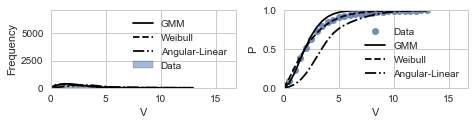

0 degree
data size: 2180 weight 0.008302168465469835
GMM Weibull
R square 0.959424058529 0.971039282213 0.394621146101
max diff: 0.0723639896119 0.036633858402 speed value: 4.5 1.0 y gmm 0.953097934566
 


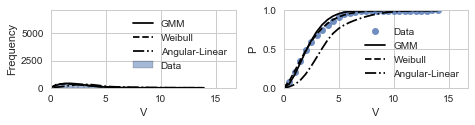

20 degree
data size: 2661 weight 0.01013397719569506
GMM Weibull
R square 0.943436424175 0.979387468152 0.510631172216
max diff: 0.0726606541544 0.02781484581 speed value: 4.0 3.5 y gmm 0.88062758388
 


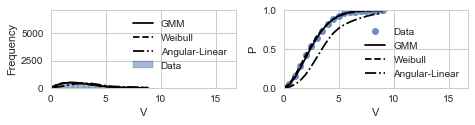

40 degree
data size: 3541 weight 0.013485311255150772
GMM Weibull
R square 0.980215169219 0.982163486477 0.559802946106
max diff: 0.0370494002666 0.0202626684727 speed value: 2.0 3.0 y gmm 0.383735688691
 


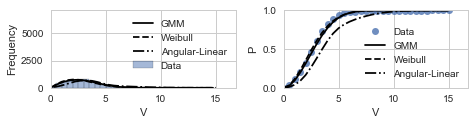

60 degree
data size: 5726 weight 0.021806521391412967
GMM Weibull
R square 0.981358959449 0.967716587238 0.842277216523
max diff: 0.05879105683 0.0307304224144 speed value: 3.5 4.0 y gmm 0.677324905447
 


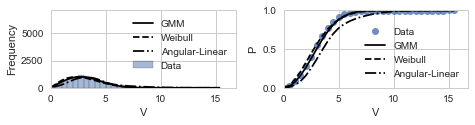

80 degree
data size: 8129 weight 0.03095794837422215
GMM Weibull
R square 0.98787320135 0.963556365319 0.897692057603
max diff: 0.0540563931309 0.0407739739021 speed value: 3.5 2.5 y gmm 0.619458184308
 


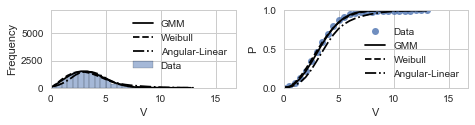

100 degree
data size: 12534 weight 0.04773366034229307
GMM Weibull
R square 0.994824245509 0.980033607312 0.944656699797
max diff: 0.0265378286628 0.0289421429722 speed value: 3.0 5.0 y gmm 0.44130962626
 


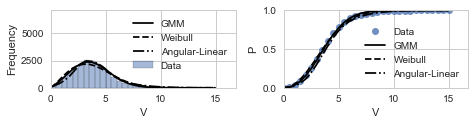

120 degree
data size: 20726 weight 0.07893153376849898
GMM Weibull
R square 0.994038784895 0.974246640291 0.983397426957
max diff: 0.021097565165 0.0272141579729 speed value: 4.0 5.5 y gmm 0.580755180179
 


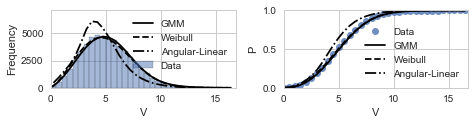

140 degree
data size: 54526 weight 0.20765322832486613
GMM Weibull
R square 0.995424606286 0.994513623789 0.856751820586
max diff: 0.0363360812823 0.0174712305866 speed value: 4.5 6.5 y gmm 0.401418384477
 


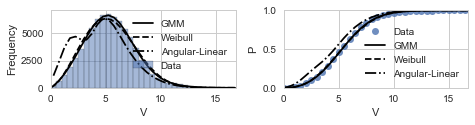

160 degree
data size: 75485 weight 0.28747210395228917
GMM Weibull
R square 0.997342606525 0.988679111333 0.836732340554
max diff: 0.0182566908535 0.0278691273318 speed value: 7.5 7.5 y gmm 0.825116164681
 


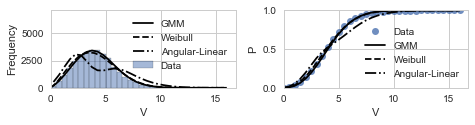

180 degree
data size: 31987 weight 0.12181718472705669
GMM Weibull
R square 0.996109735639 0.986999567782 0.716982209546
max diff: 0.0305008953623 0.023040220824 speed value: 4.5 5.5 y gmm 0.598754739739
 


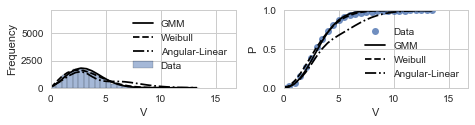

200 degree
data size: 13841 weight 0.0527111530874165
GMM Weibull
R square 0.991884067534 0.982836399639 0.846477761253
max diff: 0.0471838415886 0.0235128854309 speed value: 3.0 1.5 y gmm 0.474382519224
 


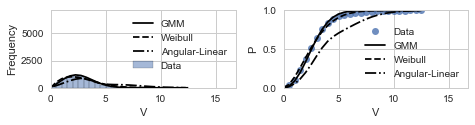

220 degree
data size: 7802 weight 0.029712623104401672
GMM Weibull
R square 0.989961740389 0.969079592702 0.78341816961
max diff: 0.0357384700608 0.0321830039809 speed value: 1.5 1.0 y gmm 0.195484293333
 


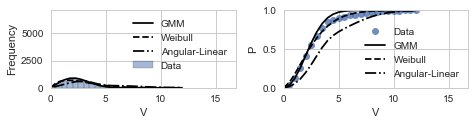

240 degree
data size: 5457 weight 0.020782079502783893
GMM Weibull
R square 0.969592104788 0.924992410997 0.720329104816
max diff: 0.0740612711256 0.0505159511183 speed value: 5.0 4.0 y gmm 0.977121560662
 


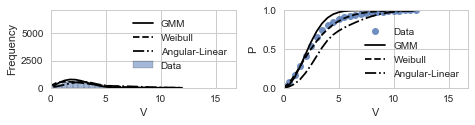

260 degree
data size: 4752 weight 0.01809720392106085
GMM Weibull
R square 0.892942955078 0.936447507475 0.715924389905
max diff: 0.0995971194928 0.056245306892 speed value: 4.0 3.5 y gmm 0.904942237338
 


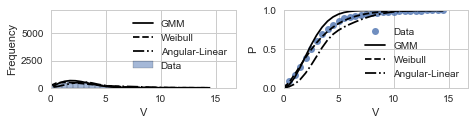

280 degree
data size: 4508 weight 0.017167970386393585
GMM Weibull
R square 0.854692645069 0.95384313103 0.755627797791
max diff: 0.10104015776 0.0339624476394 speed value: 4.5 4.0 y gmm 0.916035721203
 


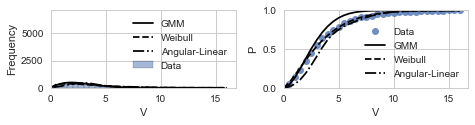

300 degree
data size: 3769 weight 0.014353611443282479
GMM Weibull
R square 0.928975647771 0.960101005957 0.797408761848
max diff: 0.111486786773 0.0315111198086 speed value: 5.0 3.5 y gmm 0.903208728933
 


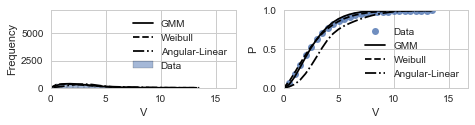

320 degree
data size: 2878 weight 0.01096038570808357
GMM Weibull
R square 0.983472716383 0.982629700694 0.644041612297
max diff: 0.0366826340773 0.0176464968098 speed value: 1.0 1.0 y gmm 0.13878644167
 


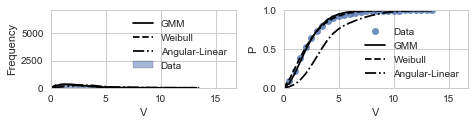

340 degree
data size: 2080 weight 0.007921335049622594
GMM Weibull
R square 0.983497402092 0.980688666109 0.449584974315
max diff: 0.0492070533045 0.0288761151759 speed value: 1.5 1.0 y gmm 0.332042946696
 
Wall time: 9.3 s


In [93]:
%%time
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

[0.9880142956901394, 0.9822738888161595, 0.8215170676523866]


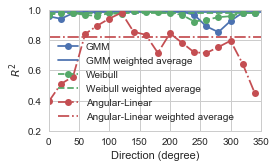

In [94]:
diff_df = pd.DataFrame(curve_collection) 

vals = [{'name': 'GMM', 'value': diff_df.r_square_gmm},
        {'name': 'Weibull', 'value': diff_df.r_square_weibull}]
if 'y_als' in globals():
    vals.append({'name': 'Angular-Linear', 'value': diff_df.r_square_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(means)

[0.03525069242429435, 0.02648834118390042, 0.15086241437759093]


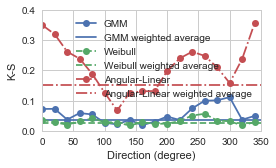

In [95]:
vals = [{'name': 'GMM', 'value': diff_df.max_cdf_diff_gmm},
        {'name': 'Weibull', 'value': diff_df.max_cdf_diff_weibull},]
if 'y_als' in globals():
    vals.append({'name': 'Angular-Linear', 'value': diff_df.max_cdf_diff_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(means)

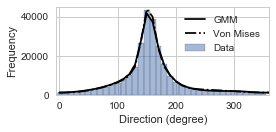

In [96]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [97]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [98]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [99]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [100]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH}

print(bandwidth, FIT_METHOD)

0.5 square_error


## 7.1  Result Variability

In [101]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

Wall time: 2min 52s


number of estimated clusters : 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000033533320>]], dtype=object)

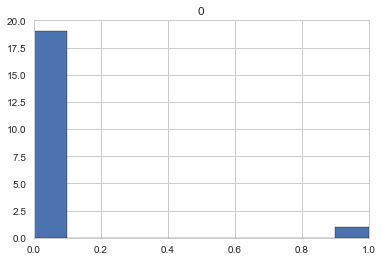

In [102]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected using
ms_bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)

pd.DataFrame(ms.labels_).hist()

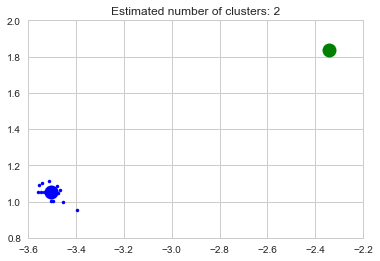

In [103]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x mean_y  sig_x  sig_y    corr
1  0.445  -3.479  1.088  2.885  2.302  -0.651
2  0.415  -1.838  1.787  2.337  1.952   0.038
3  0.140  -5.024  2.616  1.607  1.280  -0.503

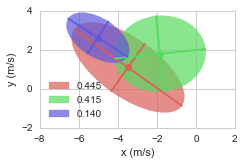

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.998  0.010     10.240  2509631666.727  5.683676e-08      0.007   

  RMSE / Mean  
0       0.083

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.999  0.010     11.278  4356609237.194  5.460701e-08      0.007   

  RMSE / Mean  
0       0.081

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.448  -3.506  1.053  2.876  2.291  -0.633
2  0.388  -1.659  1.776  2.269  1.949   0.020
3  0.163  -4.925  2.584  1.685  1.329  -0.520

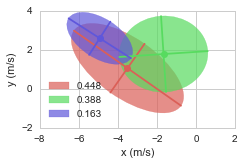

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.998  0.009      9.410  2568287020.090  5.848144e-08      0.008   

  RMSE / Mean  
0       0.084

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.999  0.009     12.031  13467937950.745  5.361402e-08      0.007   

  RMSE / Mean  
0       0.081

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.439  -3.503  1.005  2.912  2.321  -0.626
2  0.377  -1.575  1.788  2.217  1.963   0.014
3  0.185  -4.821  2.504  1.707  1.384  -0.525

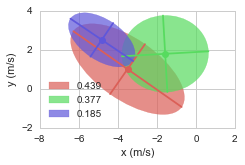

R_square    K_S Chi_square      Chi_square_2           MSE RMSE / Max  \
0    0.999  0.009     14.170  133550652638.047  5.389570e-08      0.007   

  RMSE / Mean  
0       0.081

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.999  0.008      9.880  20144669066.298  5.353853e-08      0.007   

  RMSE / Mean  
0       0.080

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.459  -3.483  1.062  2.878  2.278  -0.625
2  0.383  -1.672  1.792  2.265  1.943   0.030
3  0.158  -4.919  2.579  1.660  1.330  -0.522

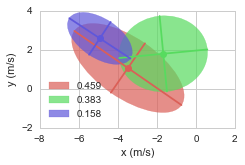

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.998  0.010     17.207  76902042798.992  5.674841e-08      0.007   

  RMSE / Mean  
0       0.083

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.999  0.010     12.468  13462138682.165  5.279394e-08      0.007   

  RMSE / Mean  
0       0.080

weight  mean_x mean_y  sig_x  sig_y    corr
1  0.453  -3.455  0.997  2.870  2.301  -0.625
2  0.377  -1.647  1.816  2.260  1.927   0.021
3  0.170  -4.860  2.536  1.688  1.349  -0.531

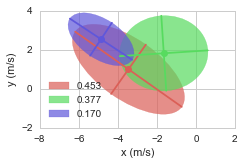

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.999  0.009     15.489  97455995179.312  5.326649e-08      0.007   

  RMSE / Mean  
0       0.080

R_square    K_S Chi_square     Chi_square_2           MSE RMSE / Max  \
0    0.999  0.009     14.055  34410603430.256  5.417959e-08      0.007   

  RMSE / Mean  
0       0.081


Cluster Number: 1


weight  mean_x mean_y  sig_x  sig_y    corr
1  0.420  -2.344  1.836  2.701  1.949   0.111
2  0.322  -4.908  2.414  1.978  1.621  -0.575
3  0.258  -1.547  0.031  2.098  2.063  -0.330

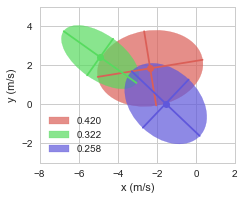

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.998  0.014      4.324  2021808396.244  6.285022e-08      0.008   

  RMSE / Mean  
0       0.087

R_square    K_S Chi_square    Chi_square_2           MSE RMSE / Max  \
0    0.998  0.013      3.848  1122073888.290  6.054366e-08      0.008   

  RMSE / Mean  
0       0.086

In [104]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [105]:
%%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 196936.5 65645.5
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    3.027748  3.640495e+09  0.030210  0.000001    0.034942     0.390443   
1    2.231466  9.363580e+07  0.030645  0.000001    0.035172     0.394767   
2    3.064995  4.334757e+09  0.029216  0.000001    0.034242     0.384516   
3    2.911893  3.583720e+09  0.030163  0.000001    0.035015     0.391197   

   R_square  
0  0.965537  
1  0.964795  
2  0.966552  
3  0.965417

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    2.186830  1.093017e+08  0.029802  0.000001    0.035165     0.396509   
1    6.364609  3.154793e+10  0.027363  0.000001    0.033823     0.378500   
2    2.711665  2.335806e+08  0.031589  0.000001    0.035400     0.398597   
3    2.514333  9.599584e+07  0.031520  0.000001    0.034815     0.393627   

   R_square  
0  0.964481  
1  0.967564  
2  0.964183  
3  0.964957

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0   12.681948  9.550904e+10  0.013923  9.964624e-08    0.009819     0.109758   
1    8.752275  6.294550e+10  0.013805  1.000796e-07    0.009814     0.109988   
2    6.834878  3.088456e+10  0.013661  9.967936e-08    0.009790     0.109752   
3   16.549666  1.186405e+11  0.014040  9.985882e-08    0.009826     0.109870   

   R_square  
0  0.997278  
1  0.997267  
2  0.997274  
3  0.997272

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    9.799534  7.678434e+10  0.014502  1.150724e-07    0.010462     0.117907   
1   16.807997  7.291216e+10  0.013688  1.075738e-07    0.010221     0.114029   
2   23.619860  1.859243e+11  0.014202  1.107770e-07    0.010387     0.115762   
3    2.184073  5.078482e+09  0.013271  1.080674e-07    0.010165     0.114279   

   R_square  
0  0.996855  
1  0.997057  
2  0.996983  
3  0.997045

  
Number of gaussian 3
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0   15.330700  2.166734e+10  0.008866  5.088066e-08    0.006978     0.078424   
1    8.439370  6.315691e+09  0.009286  5.345908e-08    0.007177     0.080390   
2   10.043467  1.815929e+10  0.009675  5.329852e-08    0.007156     0.080255   
3   14.226881  5.309013e+09  0.010178  5.358702e-08    0.007236     0.080487   

   R_square  
0  0.998613  
1  0.998539  
2  0.998546  
3  0.998531

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    7.469368  1.938643e+09  0.009671  7.554382e-08    0.008616     0.095556   
1   13.821926  6.324281e+09  0.009310  5.970033e-08    0.007600     0.084934   
2   19.367495  7.072866e+09  0.009661  6.109734e-08    0.007721     0.085971   
3   11.890404  8.924856e+10  0.009433  6.374656e-08    0.007694     0.087763   

   R_square  
0  0.997921  
1  0.998371  
2  0.998324  
3  0.998277

  
Number of gaussian 4
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.340991  8.969834e+07  0.004745  3.046700e-08    0.005417     0.060686   
1    0.381869  1.795812e+08  0.004983  3.307080e-08    0.005644     0.063235   
2    0.250253  2.490144e+06  0.005171  3.182987e-08    0.005554     0.062022   
3    0.262946  3.734768e+07  0.005690  3.231040e-08    0.005578     0.062489   

   R_square  
0  0.999167  
1  0.999097  
2  0.999130  
3  0.999117

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.282103  5.163217e+06  0.006164  5.013646e-08    0.006880     0.077845   
1    0.364672  1.975418e+07  0.004856  4.269720e-08    0.006431     0.071806   
2    0.503402  3.341553e+08  0.005680  4.329778e-08    0.006419     0.072364   
3    0.321481  2.441763e+06  0.006485  4.167746e-08    0.006356     0.070994   

   R_square  
0  0.998635  
1  0.998829  
2  0.998817  
3  0.998862

  
Number of gaussian 5
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.024913  2.321652e+03  0.002425  2.506597e-08    0.004923     0.055043   
1    2.445771  8.910568e+10  0.004933  2.039355e-08    0.004430     0.049651   
2    0.013962  5.440063e+02  0.004187  1.403952e-08    0.003676     0.041193   
3    0.013538  3.599002e+02  0.004273  1.369849e-08    0.003639     0.040693   

   R_square  
0  0.999313  
1  0.999444  
2  0.999616  
3  0.999626

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.026808  3.930677e+03  0.005167  3.426144e-08    0.005727     0.064358   
1    3.776710  1.444358e+10  0.005105  3.477853e-08    0.005811     0.064832   
2    0.021295  7.177187e+02  0.006673  2.869857e-08    0.005279     0.058906   
3    0.019443  7.330989e+02  0.005486  2.652227e-08    0.005043     0.056614   

   R_square  
0  0.999073  
1  0.999045  
2  0.999216  
3  0.999272

Wall time: 2min 47s


In [106]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    2.809026  2.913152e+09  0.030058  1.259919e-06    0.034843     0.390231   
2   11.204692  7.699490e+10  0.013857  9.981600e-08    0.009812     0.109842   
3   12.010104  1.286283e+10  0.009501  5.280632e-08    0.007137     0.079889   
4    0.309015  7.727935e+07  0.005147  3.191952e-08    0.005548     0.062108   
5    0.624546  2.227642e+10  0.003954  1.829938e-08    0.004167     0.046645   

   R_square  
1  0.965575  
2  0.997273  
3  0.998557  
4  0.999128  
5  0.999500

Test gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    3.444359  7.996703e+09  0.030069  1.270499e-06    0.034801     0.391808   
2   13.102866  8.517482e+10  0.013916  1.103727e-07    0.010309     0.115494   
3   13.137298  2.614609e+10  0.009519  6.502201e-08    0.007908     0.088556   
4    0.367915  9.037862e+07  0.005796  4.445223e-08    0.006521     0.073252   
5    0.961064  3.610897e+09  0.005608  3.106520e-08    0.005465     0.061177   

   R_square  
1  0.965296  
2  0.996985  
3  0.998223  
4  0.998786  
5  0.999152

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


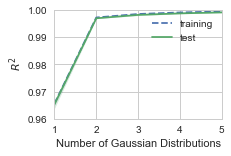

K_S


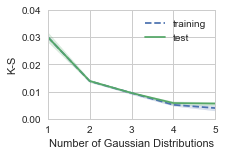

Chi_square


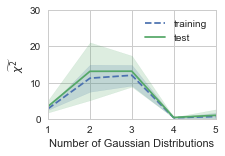

MSE


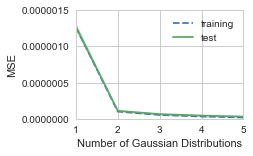

In [107]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [108]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)

In [109]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

46086
